# Machinery

In [1]:
%run Initialization.ipynb
set_plot_style(False)
data_folder = "../../data/"

%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"]="IPAGothic"
from termcolor import colored

import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf8')

公曆 20廿二年 三月 五日 週六 十八時廿二分十二秒
Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.31.1

pandas: 1.4.1
arviz : 0.11.4

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.13.0-30-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 16
Architecture: 64bit



'en_US.utf8'

In [2]:
!mkdir ../../figures_20210825
!mkdir ../../figures_20210825/draft

## <font color="orange">Loading the shape file</font>

In [3]:
filename = data_folder+'maps/by_district/TOWN_MOI_1100415.shp'
#layers
lrs = fiona.listlayers(filename)
lrs

DriverError: ../../data/maps/by_district/TOWN_MOI_1100415.shp: No such file or directory

In [4]:
gdf = gpd.read_file(filename,layer=lrs[-1], encoding='utf-8')
gdf['COUNTYNAME'] = ['台北市' if x=='臺北市' else x for x in gdf['COUNTYNAME']]
gdf['COUNTYNAME'] = ['台中市' if x=='臺中市' else x for x in gdf['COUNTYNAME']]
gdf['COUNTYNAME'] = ['台南市' if x=='臺南市' else x for x in gdf['COUNTYNAME']]
gdf['COUNTYNAME'] = ['台東縣' if x=='臺東縣' else x for x in gdf['COUNTYNAME']]
gdf[:5]

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,台東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,台東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,台東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."


In [5]:
filename_counties = data_folder+'maps/by_county/COUNTY_MOI_1090820.shp'
lrs = fiona.listlayers(filename_counties)
gdf_counties = gpd.read_file(filename_counties,layer=lrs[-1], encoding='utf-8')
gdf_counties['COUNTYNAME'] = ['台北市' if x=='臺北市' else x for x in gdf_counties['COUNTYNAME']]
gdf_counties['COUNTYNAME'] = ['台中市' if x=='臺中市' else x for x in gdf_counties['COUNTYNAME']]
gdf_counties['COUNTYNAME'] = ['台南市' if x=='臺南市' else x for x in gdf_counties['COUNTYNAME']]
gdf_counties['COUNTYNAME'] = ['台東縣' if x=='臺東縣' else x for x in gdf_counties['COUNTYNAME']]
gdf_counties = gdf_counties.drop(['COUNTYID','COUNTYID','COUNTYCODE'],axis=1)\
    .rename(columns={'COUNTYNAME':'county', 'COUNTYENG': 'county_eng'})
gdf_counties[:5]

,county,county_eng,geometry
0,連江縣,Lienchiang County,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ..."
1,宜蘭縣,Yilan County,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ..."
2,彰化縣,Changhua County,"POLYGON ((120.45655 24.20719, 120.48589 24.197..."
3,南投縣,Nantou County,"POLYGON ((121.27086 24.23661, 121.27108 24.236..."
4,雲林縣,Yunlin County,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ..."


In [6]:
gdf_counties.county

0     連江縣
1     宜蘭縣
2     彰化縣
3     南投縣
4     雲林縣
5     基隆市
6     台北市
7     新北市
8     台中市
9     台南市
10    桃園市
11    苗栗縣
12    嘉義市
13    嘉義縣
14    金門縣
15    高雄市
16    台東縣
17    花蓮縣
18    澎湖縣
19    新竹市
20    新竹縣
21    屏東縣
Name: county, dtype: object

In [7]:
# inland water
filename_counties = data_folder+'maps/inland_water/riverpoly.shp'
lrs = fiona.listlayers(filename_counties)
gdf_inland_water = gpd.read_file(filename_counties,layer=lrs[-1], encoding='utf-8')
# gdf_inland_water = gdf_inland_water.drop(['ISO','COUNTRY','F_CODE_DES','HYC_DESCRI'],axis=1)
gdf_inland_water[:5]

,RIVER_NAME,RIVER_TYPE,RIVER_CODE,RIVER_FROM,geometry
0,基隆河,1,114030110.0,淡水河,"POLYGON ((329700.702 2778440.466, 329718.300 2..."
1,田寮河,5,NaN,None,"POLYGON ((330452.047 2778680.465, 330452.544 2..."
2,田寮河,5,NaN,None,"POLYGON ((330486.340 2779079.311, 330484.371 2..."
3,大武崙溪,5,NaN,None,"POLYGON ((321810.122 2781340.980, 321802.121 2..."
4,大武崙溪,5,NaN,None,"POLYGON ((321948.219 2780818.024, 321957.180 2..."


In [8]:
gdf_inland_water_ = gdf_inland_water.to_crs(epsg=4326)

In [9]:
# all counties
gdf.loc[:,'COUNTYNAME'].unique()

array(['台東縣', '屏東縣', '雲林縣', '彰化縣', '苗栗縣', '新竹縣', '嘉義縣', '高雄市', '宜蘭縣',
       '連江縣', '金門縣', '台中市', '澎湖縣', '南投縣', '花蓮縣', '基隆市', '台北市', '新北市',
       '台南市', '桃園市', '嘉義市', '新竹市'], dtype=object)

findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.


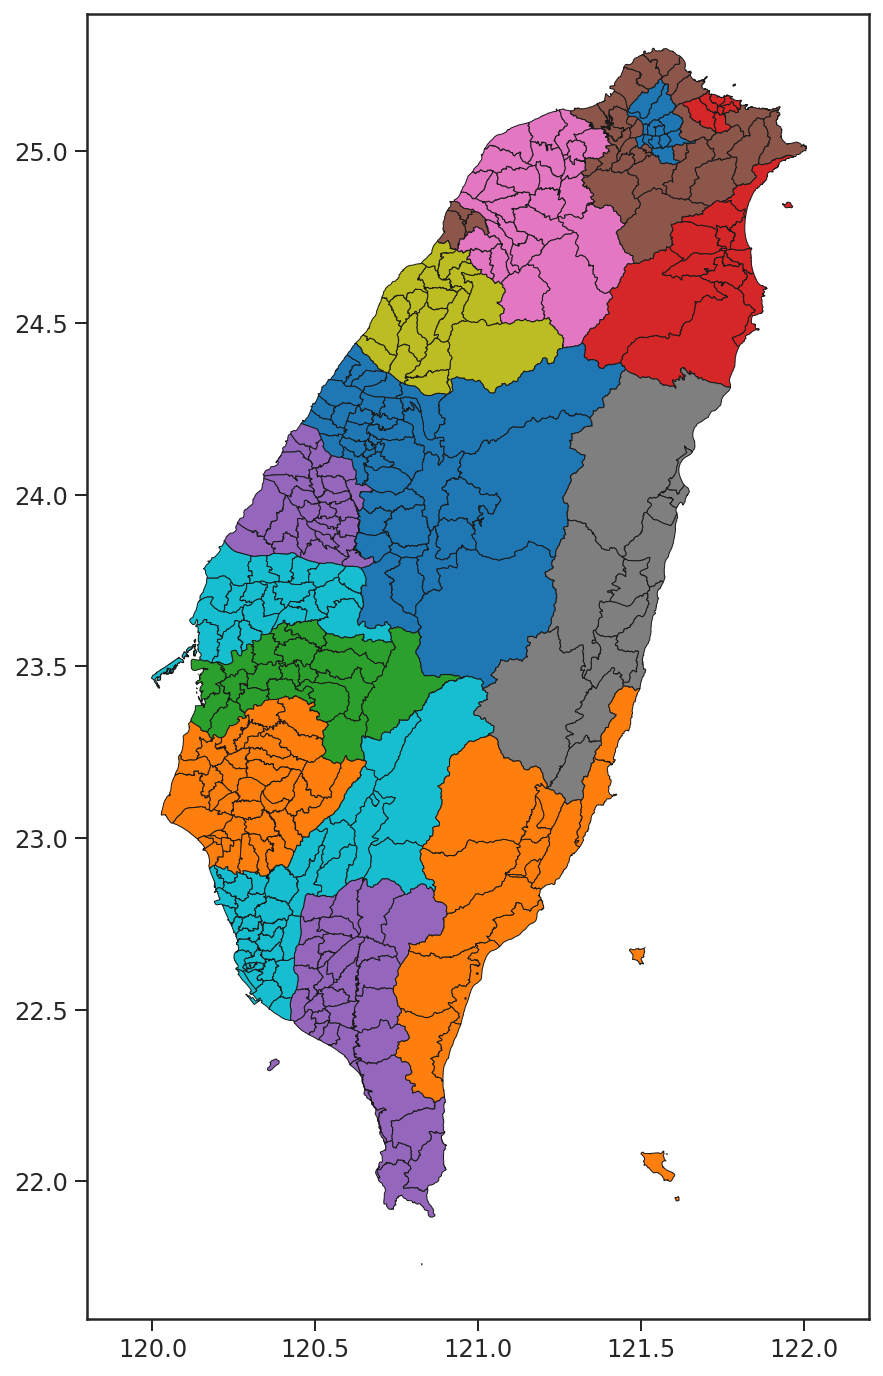

In [10]:
fig, ax = plt.subplots(figsize=(8, 12))
gdf.plot(column='COUNTYNAME', ax=ax, edgecolor='k',lw=.5)
ax.set_ylim(21.6,25.4); ax.set_xlim(119.8,122.2);
# ax.set_xlim(139,146.5);

In [11]:
gdf = gdf.drop(['COUNTYID','COUNTYCODE','TOWNID','TOWNCODE'],axis=1)\
    .rename(columns={'COUNTYNAME':'county', 'TOWNNAME':'district', 'TOWNENG': 'district_eng'})
gdf[:5]

,county,district,district_eng,geometry
0,台東縣,成功鎮,Chenggong Township,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,屏東縣,佳冬鄉,Jiadong Township,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,雲林縣,麥寮鄉,Mailiao Township,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,台東縣,綠島鄉,Ludao Township,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,台東縣,蘭嶼鄉,Lanyu Township,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."


In [12]:
gdf['county'].unique()

array(['台東縣', '屏東縣', '雲林縣', '彰化縣', '苗栗縣', '新竹縣', '嘉義縣', '高雄市', '宜蘭縣',
       '連江縣', '金門縣', '台中市', '澎湖縣', '南投縣', '花蓮縣', '基隆市', '台北市', '新北市',
       '台南市', '桃園市', '嘉義市', '新竹市'], dtype=object)

In [13]:
gdf_ = gdf.loc[lambda d: d.county.isin(['基隆市','新北市','台北市'])] #
gdf_counties_ = gdf_counties.loc[lambda d: d.county.isin(['基隆市','新北市','台北市'])]

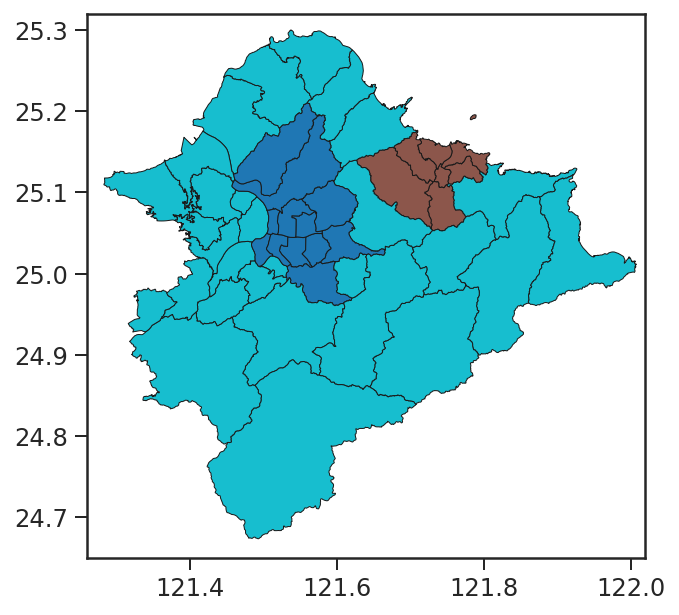

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
gdf_.plot(column='county', ax=ax, edgecolor='k',lw=.5)
ax.set_ylim(24.65,25.32); ax.set_xlim(121.26,122.02);

# Loading data

In [15]:
truncation_date = pd.to_datetime("2021-08-25")

In [ ]:
datafilename = "../../data/LineList_"+truncation_date.strftime("%d%B%Y")+".xlsx"
Df = pd.read_excel(datafilename, na_values=["NA","","疫調中","無症狀","調查中"])
Df = Df.rename(columns={
            '案號': 'ID', '發病日': 'Onset', '發病日_公開': 'Onset_from_DeathReports',
            '通報日': 'Report', '研判日': 'Confirm', 
            '住院日_左': 'HospitalizationL', '住院日_右': 'HospitalizationR', '確診日': 'Diagnosis', 
            '解除隔離日': 'DischargeQuarantine', '解隔出院日': 'DischargeHospital',
            '採檢日': 'Inspection', '隔離日': 'Quarantine',
            '死亡日': 'Death', '死亡日_公告': 'DeathReport', 
            '性別': 'Gender', '年齡': 'Age', '症狀': 'Symptoms', '慢性病史': 'ChronicDisease',
            '居住區別': 'area', '居住縣市': 'county', '鄉鎮市區': 'district',
            '境外移入': 'Imported'})
searchfor = ['Contacts', 'Exposure', '死亡', 'Cluster']
Df = Df.loc[:, ~Df.columns.str.contains('|'.join(searchfor), case=False)]\
    .loc[lambda d: d.Imported!='是'] #removing imported cases
Df['Severity'] = ['mild' if (pd.isnull(x))|(x=='無併發症之輕症') else ('moderate' if (x=='肺炎') else ('severe' if (x=='嚴重肺炎') else 'critical')) for x in Df['重症_'+truncation_date.strftime("%Y%m%d")]]
Df[:5] # hidden

In [17]:
# total number of cases
Df.shape[0]

14442

In [18]:
# total number of moderate cases
print(round(Df.loc[lambda d: d.Severity=='moderate'].shape[0] / Df.shape[0] * 100,1))
Df.loc[lambda d: d.Severity=='moderate'].shape[0]

1.6


238

In [19]:
# total number of severe cases
print(round(Df.loc[lambda d: d.Severity=='severe'].shape[0] / Df.shape[0] * 100,1))
Df.loc[lambda d: d.Severity=='severe'].shape[0]

16.7


2414

In [20]:
# total number of critical cases
print(round(Df.loc[lambda d: d.Severity=='critical'].shape[0] / Df.shape[0] * 100,1))
Df.loc[lambda d: d.Severity=='critical'].shape[0]

3.1


441

In [21]:
# total number of severe cases
Df.loc[lambda d: d.Severity!='mild'].shape[0]

3093

In [ ]:
# deaths due to other reasons
Df_death_other_reasons = Df.loc[lambda d: ~pd.isnull(d.Death)].loc[lambda d: (~pd.isnull(d.Remarks))&(d['Remarks'].str.contains('因其他原因死亡'))]

In [23]:
# total number of deaths due to other reasons
Df_death_other_reasons.shape[0]

19

In [ ]:
# deaths by COVID-19
Df_deaths = Df.loc[lambda d: ~pd.isnull(d.Death)].loc[lambda d: ~((~pd.isnull(d.Remarks))&(d['Remarks'].str.contains('因其他原因死亡')))]

In [25]:
# total number of deaths 
Df_deaths.shape[0]

787

In [26]:
# percentage of deaths compared to the total number of confirmed cases
round(Df_deaths.shape[0] / Df.shape[0] * 100, 1)

5.4

In [27]:
# mean age of death
round(np.mean(Df_deaths.Age.values))

73

In [28]:
# 25th percentile 
np.percentile(Df_deaths.Age.values, 25, interpolation = 'midpoint')

66.0

In [29]:
# 75th percentile
np.percentile(Df_deaths.Age.values, 75, interpolation = 'midpoint')

81.5

In [30]:
# percentage of individuals older than 65 y.o.
round(Df_deaths.loc[lambda d: d.Age>=65].shape[0] / Df_deaths.shape[0] * 100, 1)

79.8

In [31]:
# pecentage of death among males
round(Df_deaths.loc[lambda d: d.Gender=='男'].shape[0] / Df_deaths.shape[0] * 100, 1)

63.5

In [32]:
# chronic conditions
Df_deaths.ChronicDisease.drop_duplicates().values

array(['有', '高血壓、糖尿病', '無', '高血壓', '慢性肝炎', nan, '高血壓、糖尿病、\n惡性腫瘤、心臟病',
       '糖尿病、腎臟病、\n心臟病', '高血壓、腦中風', '心臟病、心臟衰竭', '高血壓、高血脂\n症、腦中風', '胃癌',
       '心臟病、慢性阻塞\n性肺病、糖尿病', '冠狀動脈疾病、糖\n尿病、高血壓', '糖尿病、慢性阻塞\n性肺病',
       '糖尿病、慢性阻塞\n性肺疾病、心臟病', '糖尿病、高血壓、\n心臟病', '糖尿病、高血壓、\n心律不整',
       '帶狀疱疹、慢性阻\n塞性肺病', '洗腎、心臟病', '癌症', '洗腎、高血壓、糖\n尿病、痛風性腎病', '扁桃腺惡性腫瘤',
       '高血壓疾病', '心臟病', '高血壓、慢性阻塞\n性肺病、癌症', '糖尿病', '心臟病、糖尿病', '心血管疾病',
       '糖尿病、癌症', '糖尿病、高血壓、哮喘', '癌症、心臟病', '慢性阻塞性肺病、\n腦血管疾病、腎臟', '高血壓、肝硬化',
       '中風', '心血管疾病、慢性\n阻塞性肺病', '糖尿病、高血壓', '高血壓、糖尿病、心臟病',
       '糖尿病、慢性阻塞\n性肺疾病、慢性肝\n炎、氣喘', '高血壓、中風、腎\n臟病、癌症', '冠狀動脈疾病',
       '糖尿病、高血壓、心血管疾病', '糖尿病、高血壓、\n高血脂', '高血壓、糖尿病、\n腎臟病', '慢性腎臟病、癌症',
       '腎臟病、心臟病', '糖尿病、心臟病', '糖尿病、惡性腫\n瘤、痛風、肝硬化', '肺結核、腎臟病',
       '慢性腎臟病、糖尿\n病、高血壓', '糖尿病、慢性B型肝炎', '高血壓、心臟病', '心臟病、腦中風', '中風、高血壓',
       '高血壓、痛風、腎\n臟病', '冠狀動脈疾病、慢\n性阻塞性肺病', '糖尿病、腎臟病', '高血壓、糖尿病、\n心律不整、氣喘',
       '癌症、糖尿病、慢性腎病', '高血壓、糖尿病、\n高血脂', '高血壓、心臟病、\n腎臟病', '不明', '腦中風',
       '高血壓性心臟病', '高血壓、腦中風、\n腎臟病', '高血壓、高血脂

In [33]:
# number of deaths with pre-existing chronic conditions
Df_deaths.shape[0] - Df_deaths.loc[lambda d: (d.ChronicDisease=='無')|(pd.isnull(d.ChronicDisease))].shape[0]

709

In [ ]:
# cases with unknown history of chronic diseases
Df_deaths.loc[lambda d: (pd.isnull(d.ChronicDisease))]

In [35]:
# percentage of deaths with pre-existing chronic conditions
round((Df_deaths.shape[0] - Df_deaths.loc[lambda d: (d.ChronicDisease=='無')|(pd.isnull(d.ChronicDisease))].shape[0]) / Df_deaths.shape[0] * 100, 1)

90.1

In [36]:
# processed data
Df_processed = pd.read_csv(truncation_date.strftime("%Y%m%d")+"-data.csv")
Df_processed.columns

Index(['ID', 'SevereL', 'SevereR', 'Onset', 'Report', 'Confirm', 'Gender',
       'Age', 'ResidArea', 'ResidCounty', 'ResidTown', '出院', '年齡層', '變異株',
       'Variant_Cluster', 'TestDate', 'Ct value', 'Breakthrough', 'Remarks',
       'ChronicDisease', 'Inspection', 'Quarantine', '解除隔離日',
       'HospitalizationL', 'HospitalizationR', '解隔出院日', 'Diagnosis', 'Death',
       'DeathReport', 'Symptoms', 'ReportDay', 'OnsetDay', 'DeathDay',
       'DeathReportDay', 'ConfirmDay', 'ResidCounty_eng', 'Age_group',
       'OnsetL', 'OnsetR', 'Asymptomatic'],
      dtype='object')

In [37]:
Df_processed.shape

(14444, 40)

In [38]:
Df_processed.ResidCounty.drop_duplicates().values

array(['桃園市', '台北市', '新北市', '新竹縣', '宜蘭縣', '基隆市', '高雄市', '彰化縣', '台中市',
       '苗栗縣', '雲林縣', '新竹市', '台南市', '南投縣', '屏東縣', '花蓮縣', '嘉義縣', '嘉義市',
       '台東縣', '連江縣', '澎湖縣'], dtype=object)

In [39]:
Df_processed.loc[lambda d: d.ResidCounty=='台北市'].ResidTown.drop_duplicates().values

array([nan, '內湖區', '萬華區', '北投區', '大安區', '松山區', '信義區', '中正區', '文山區', '中山區',
       '南港區', '大同區', '士林區'], dtype=object)

In [40]:
Df_processed.loc[lambda d: d.ResidCounty=='新北市'].ResidTown.drop_duplicates().values

array([nan, '土城區', '蘆洲區', '三重區', '中和區', '五股區', '新莊區', '板橋區', '永和區', '萬里區',
       '樹林區', '淡水區', '林口區', '新店區', '三峽區', '八里區', '汐止區', '泰山區', '鶯歌區',
       '深坑區', '石碇區', '金山區', '三芝區', '瑞芳區', '石門區', '坪林區', '烏來區', '貢寮區'],
      dtype=object)

In [41]:
# for Taiwan
print("Percentage regarding total number of cases: ", round(Df_processed.shape[0] / Df_processed.shape[0] * 100, 1))
print("Number of cases: ", Df_processed.shape[0])

print("For different age groups:")
print("<17:", Df_processed.loc[lambda d: (d.Age<17)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.Age<17)].shape[0] / Df_processed.shape[0] * 100, 1), "% )")
print("17-34:", Df_processed.loc[lambda d: (d.Age>=17)&(d.Age<35)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.Age>=17)&(d.Age<=34)].shape[0] / Df_processed.shape[0] * 100, 1), "% )")
print("35-64:", Df_processed.loc[lambda d: (d.Age>=35)&(d.Age<65)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.Age>=35)&(d.Age<65)].shape[0] / Df_processed.shape[0] * 100, 1), "% )")
print("65+:", Df_processed.loc[lambda d: (d.Age>=65)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.Age>=65)].shape[0] / Df_processed.shape[0] * 100, 1), "% )")

print("By sex:")
print("Female:", Df_processed.loc[lambda d: (d.Gender=='女')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.Gender=='女')].shape[0] / Df_processed.shape[0] * 100, 1), "% )")
print("Male:", Df_processed.loc[lambda d: (d.Gender=='男')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.Gender=='男')].shape[0] / Df_processed.shape[0] * 100, 1), "% )")

print("By severity:")
print("Mild/asymptomatic:", Df.loc[lambda d: (d.Severity=='mild')].shape[0], "(", 
      round(Df.loc[lambda d: (d.Severity=='mild')].shape[0] / Df.shape[0] * 100, 1), "% )")
print("Severe:", Df.loc[lambda d: (d.Severity!='mild')].shape[0], "(", 
      round(Df.loc[lambda d: (d.Severity!='mild')].shape[0] / Df.shape[0] * 100, 1), "% )")

print("By known symptomaticity:")
print("No:", Df_processed.loc[lambda d: (d.Asymptomatic=='Yes')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.Asymptomatic=='Yes')].shape[0] / Df_processed.shape[0] * 100, 1), "% )")
print("Yes:", Df_processed.loc[lambda d: (d.Asymptomatic=='No')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.Asymptomatic=='No')].shape[0] / Df_processed.shape[0] * 100, 1), "% )")

Percentage regarding total number of cases:  100.0
Number of cases:  14444
For different age groups:
<17: 845 ( 5.9 % )
17-34: 2669 ( 18.5 % )
35-64: 7491 ( 51.9 % )
65+: 3439 ( 23.8 % )
By sex:
Female: 7150 ( 49.5 % )
Male: 7294 ( 50.5 % )
By severity:
Mild/asymptomatic: 11349 ( 78.6 % )
Severe: 3093 ( 21.4 % )
By known symptomaticity:
No: 5038 ( 34.9 % )
Yes: 9406 ( 65.1 % )


In [42]:
# number of cases from Taipei
county = "台北市"
print("Percentage regarding total number of cases: ", round(Df_processed.loc[lambda d: d.ResidCounty==county].shape[0] / Df_processed.shape[0] * 100, 1))
print("Number of cases: ", Df_processed.loc[lambda d: d.ResidCounty=='台北市'].shape[0])

print("For different age groups:")
print("<17:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age<17)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age<17)].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")
print("17-34:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=17)&(d.Age<35)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=17)&(d.Age<=34)].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")
print("35-64:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=35)&(d.Age<65)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=35)&(d.Age<65)].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")
print("65+:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=65)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=65)].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")

print("By sex:")
print("Female:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Gender=='女')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Gender=='女')].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")
print("Male:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Gender=='男')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Gender=='男')].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")

print("By severity:")
print("Mild/asymptomatic:", Df.loc[lambda d: (d.county==county)&(d.Severity=='mild')].shape[0], "(", 
      round(Df.loc[lambda d: (d.county==county)&(d.Severity=='mild')].shape[0] / Df.loc[lambda d: (d.county==county)].shape[0] * 100, 1), "% )")
print("Severe:", Df.loc[lambda d: (d.county==county)&(d.Severity!='mild')].shape[0], "(", 
      round(Df.loc[lambda d: (d.county==county)&(d.Severity!='mild')].shape[0] / Df.loc[lambda d: (d.county==county)].shape[0] * 100, 1), "% )")

print("By known symptomaticity:")
print("No:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Asymptomatic=='Yes')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Asymptomatic=='Yes')].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")
print("Yes:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Asymptomatic=='No')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Asymptomatic=='No')].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")

Percentage regarding total number of cases:  33.6
Number of cases:  4851
For different age groups:
<17: 225 ( 4.6 % )
17-34: 645 ( 13.3 % )
35-64: 2629 ( 54.2 % )
65+: 1352 ( 27.9 % )
By sex:
Female: 2503 ( 51.6 % )
Male: 2348 ( 48.4 % )
By severity:
Mild/asymptomatic: 3807 ( 78.5 % )
Severe: 1043 ( 21.5 % )
By known symptomaticity:
No: 1710 ( 35.3 % )
Yes: 3141 ( 64.7 % )


In [43]:
# number of cases from New Taipei
county = "新北市"
print("Percentage regarding total number of cases: ", round(Df_processed.loc[lambda d: d.ResidCounty==county].shape[0] / Df_processed.shape[0] * 100, 1))
print("Number of cases: ", Df_processed.loc[lambda d: d.ResidCounty==county].shape[0])

print("For different age groups:")
print("<17:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age<17)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age<17)].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")
print("17-34:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=17)&(d.Age<35)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=17)&(d.Age<=34)].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")
print("35-64:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=35)&(d.Age<65)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=35)&(d.Age<65)].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")
print("65+:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=65)].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Age>=65)].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")

print("By sex:")
print("Female:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Gender=='女')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Gender=='女')].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")
print("Male:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Gender=='男')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Gender=='男')].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")

print("By severity:")
print("Mild/asymptomatic:", Df.loc[lambda d: (d.county==county)&(d.Severity=='mild')].shape[0], "(", 
      round(Df.loc[lambda d: (d.county==county)&(d.Severity=='mild')].shape[0] / Df.loc[lambda d: (d.county==county)].shape[0] * 100, 1), "% )")
print("Severe:", Df.loc[lambda d: (d.county==county)&(d.Severity!='mild')].shape[0], "(", 
      round(Df.loc[lambda d: (d.county==county)&(d.Severity!='mild')].shape[0] / Df.loc[lambda d: (d.county==county)].shape[0] * 100, 1), "% )")

print("By known symptomaticity:")
print("No:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Asymptomatic=='Yes')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Asymptomatic=='Yes')].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")
print("Yes:", Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Asymptomatic=='No')].shape[0], "(", 
      round(Df_processed.loc[lambda d: (d.ResidCounty==county)&(d.Asymptomatic=='No')].shape[0] / Df_processed.loc[lambda d: (d.ResidCounty==county)].shape[0] * 100, 1), "% )")

Percentage regarding total number of cases:  47.5
Number of cases:  6855
For different age groups:
<17: 410 ( 6.0 % )
17-34: 1173 ( 17.1 % )
35-64: 3657 ( 53.3 % )
65+: 1615 ( 23.6 % )
By sex:
Female: 3387 ( 49.4 % )
Male: 3468 ( 50.6 % )
By severity:
Mild/asymptomatic: 5309 ( 77.5 % )
Severe: 1545 ( 22.5 % )
By known symptomaticity:
No: 2194 ( 32.0 % )
Yes: 4661 ( 68.0 % )


In [44]:
# other counties
counties_to_remove = ["台北市", "新北市"]
print("Percentage regarding total number of cases: ", round(Df_processed.loc[lambda d:  ~d.ResidCounty.isin(counties_to_remove)].shape[0] / Df_processed.shape[0] * 100, 1))
print("Number of cases: ", Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)].shape[0])

print("For different age groups:")
print("<17:", Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Age<17)].shape[0], "(", 
      round(Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Age<17)].shape[0] / Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)].shape[0] * 100, 1), "% )")
print("17-34:", Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Age>=17)&(d.Age<35)].shape[0], "(", 
      round(Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Age>=17)&(d.Age<=34)].shape[0] / Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)].shape[0] * 100, 1), "% )")
print("35-64:", Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Age>=35)&(d.Age<65)].shape[0], "(", 
      round(Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Age>=35)&(d.Age<65)].shape[0] / Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)].shape[0] * 100, 1), "% )")
print("65+:", Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Age>=65)].shape[0], "(", 
      round(Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Age>=65)].shape[0] / Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)].shape[0] * 100, 1), "% )")

print("By sex:")
print("Female:", Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Gender=='女')].shape[0], "(", 
      round(Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Gender=='女')].shape[0] / Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)].shape[0] * 100, 1), "% )")
print("Male:", Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Gender=='男')].shape[0], "(", 
      round(Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Gender=='男')].shape[0] / Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)].shape[0] * 100, 1), "% )")

print("By severity:")
print("Mild/asymptomatic:", Df.loc[lambda d: ~d.county.isin(counties_to_remove)&(d.Severity=='mild')].shape[0], "(", 
      round(Df.loc[lambda d: ~d.county.isin(counties_to_remove)&(d.Severity=='mild')].shape[0] / Df.loc[lambda d: ~d.county.isin(counties_to_remove)].shape[0] * 100, 1), "% )")
print("Severe:", Df.loc[lambda d: ~d.county.isin(counties_to_remove)&(d.Severity!='mild')].shape[0], "(", 
      round(Df.loc[lambda d: ~d.county.isin(counties_to_remove)&(d.Severity!='mild')].shape[0] / Df.loc[lambda d: ~d.county.isin(counties_to_remove)].shape[0] * 100, 1), "% )")

print("By known symptomaticity:")
print("No:", Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Asymptomatic=='Yes')].shape[0], "(", 
      round(Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Asymptomatic=='Yes')].shape[0] / Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)].shape[0] * 100, 1), "% )")
print("Yes:", Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Asymptomatic=='No')].shape[0], "(", 
      round(Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)&(d.Asymptomatic=='No')].shape[0] / Df_processed.loc[lambda d: ~d.ResidCounty.isin(counties_to_remove)].shape[0] * 100, 1), "% )")

Percentage regarding total number of cases:  19.0
Number of cases:  2738
For different age groups:
<17: 210 ( 7.7 % )
17-34: 851 ( 31.1 % )
35-64: 1205 ( 44.0 % )
65+: 472 ( 17.2 % )
By sex:
Female: 1260 ( 46.0 % )
Male: 1478 ( 54.0 % )
By severity:
Mild/asymptomatic: 2233 ( 81.6 % )
Severe: 505 ( 18.4 % )
By known symptomaticity:
No: 1134 ( 41.4 % )
Yes: 1604 ( 58.6 % )


In [45]:
# max number of cases from other counties
max(Df_processed.loc[lambda d: (d.ResidCounty!='台北市')&(d.ResidCounty!='新北市')].groupby('ResidCounty').cumcount() + 1)

762

In [46]:
# number of cases from Matsu
Df_processed.loc[lambda d: d.ResidCounty=='連江縣'].shape[0]

4

In [47]:
# number of cases from Penghu islands
Df_processed.loc[lambda d: d.ResidCounty=='澎湖縣'].shape[0]

5

In [48]:
# number of cases from Wanhua Taipei
print(round(Df_processed.loc[lambda d: d.ResidTown=='萬華區'].shape[0] / Df_processed.shape[0] * 100, 1))
Df_processed.loc[lambda d: d.ResidTown=='萬華區'].shape[0]

13.0


1875

In [49]:
# number of cases from Banciao Xinbei
print(round(Df_processed.loc[lambda d: d.ResidTown=='板橋區'].shape[0] / Df_processed.shape[0] * 100, 1))
Df_processed.loc[lambda d: d.ResidTown=='板橋區'].shape[0]

9.7


1397

In [50]:
# number of cases from Banciao Xinbei
print(round(Df_processed.loc[lambda d: d.ResidTown=='中和區'].shape[0] / Df_processed.shape[0] * 100, 1))
Df_processed.loc[lambda d: d.ResidTown=='中和區'].shape[0]

7.8


1122

In [51]:
# number of asymptomatic cases
Df_processed.loc[lambda d: d.Asymptomatic=='Yes'].shape[0]

5038

In [52]:
# percentage of asymptomatic cases
round(Df_processed.loc[lambda d: d.Asymptomatic=='Yes'].shape[0] / Df_processed.shape[0] * 100, 1)

34.9

In [53]:
# mean age
round(np.mean(Df_processed.Age.values))

49

In [54]:
# 25th percentile 
np.percentile(Df_processed.Age.values, 25, interpolation = 'midpoint')

35.0

In [55]:
# 75th percentile
np.percentile(Df_processed.Age.values, 75, interpolation = 'midpoint')

64.0

In [56]:
# percentage of individuals older than 65 y.o.
round(Df_processed.loc[lambda d: d.Age>=65].shape[0] / Df_processed.shape[0] * 100, 1)

23.8

In [57]:
# percentage of individuals in the age group [35,65)
round(Df_processed.loc[lambda d: (d.Age<65)&(d.Age>=35)].shape[0] / Df_processed.shape[0] * 100, 1)

51.9

In [58]:
# percentage of individuals younger than 17 y.o.
round(Df_processed.loc[lambda d: d.Age<17].shape[0] / Df_processed.shape[0] * 100, 1)

5.9

In [59]:
# percentage of severe cases among individuals younger than 17 y.o.
round(Df.loc[lambda d: (d.Age<17)&(d.Severity!='mild')].shape[0] / Df.loc[lambda d: d.Age<17].shape[0] * 100, 2)

0.36

In [60]:
round(Df_processed.loc[lambda d: (d.Age<17)&(d.Asymptomatic=='Yes')].shape[0] / Df_processed.loc[lambda d: d.Age<17].shape[0] * 100, 1)

50.3

In [61]:
round(Df.loc[lambda d: (d.Age>=65)&(d.Severity!='mild')].shape[0] / Df.loc[lambda d: d.Age>=65].shape[0] * 100, 1)

46.6

In [62]:
round(Df_processed.loc[lambda d: (d.Age>=65)&(d.Asymptomatic=='Yes')].shape[0] / Df_processed.loc[lambda d: d.Age>=65].shape[0] * 100, 1)

22.2

In [63]:
mindate = min(Df.Onset)
mindate

Timestamp('2021-04-01 00:00:00')

In [64]:
truncation_day = pd.to_numeric((truncation_date - mindate).days)
truncation_day

146

In [65]:
df_cases = Df.loc[lambda d: d.Confirm<=truncation_date].\
    groupby('district')['ID'].agg(len).reset_index().rename(columns={'ID':'n'})
df_cases

,district,n
0,七堵區,37
1,三峽區,89
2,三民區,10
3,三灣鄉,3
4,三芝區,7
...,...,...
201,麻豆區,4
202,鼓山區,5
203,龍井區,16
204,龍潭區,31


In [66]:
df_deaths = Df_deaths.loc[lambda d: d.DeathReport<=truncation_date].\
    groupby('district')['ID'].agg(len).reset_index().rename(columns={'ID':'n_deaths'})
df_deaths

,district,n_deaths
0,三峽區,7
1,三芝區,1
2,三重區,54
3,中和區,63
4,中壢區,1
...,...,...
62,西屯區,1
63,頭城鎮,1
64,鶯歌區,2
65,龍潭區,2


In [67]:
gdf_cases = gdf_.merge(df_cases,how='left').merge(df_deaths,how='left')
gdf_cases['n'] = [int(x) if x>0 else 0 for x in gdf_cases['n']]
gdf_cases['n_deaths'] = [int(x) if x>0 else 0 for x in gdf_cases['n_deaths']]
xmax = 1000
gdf_cases['log10n'] = [(np.log10(x) if x<=xmax else np.log10(xmax)) if x>0 else -1 for x in gdf_cases['n']]
gdf_cases['n_capped'] = [(x if x<=xmax else xmax) if x>0 else -1 for x in gdf_cases['n']]
gdf_cases[:5]

,county,district,district_eng,geometry,n,n_deaths,log10n,n_capped
0,基隆市,暖暖區,Nuannuan District,"POLYGON ((121.75000 25.10966, 121.74998 25.109...",25,1,1.397940,25
1,台北市,大安區,Da'an District,"POLYGON ((121.54384 25.04491, 121.54407 25.044...",296,22,2.471292,296
2,台北市,文山區,Wenshan District,"POLYGON ((121.59725 25.01439, 121.59724 25.014...",372,29,2.570543,372
3,新北市,永和區,Yonghe District,"POLYGON ((121.51239 25.02175, 121.51255 25.021...",503,29,2.701568,503
4,新北市,新店區,Xindian District,"POLYGON ((121.60922 24.96402, 121.60929 24.963...",379,26,2.578639,379


In [68]:
#clipping 
gdf_inland_water__ = gpd.clip(gdf_inland_water_, gdf_)
#to show outter border
gdf_counties_outter = gdf_counties_.copy()
gdf_counties_outter['ID'] = 1
gdf_counties_outter = gdf_counties_outter.dissolve(by='ID', aggfunc='sum').reset_index()

/tmp/ipykernel_3786013/3048614492.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:3824

  gdf_inland_water__ = gpd.clip(gdf_inland_water_, gdf_)


In [69]:
#to show outter border of all Taiwan
gdf_twn_outter = gdf.copy()
gdf_twn_outter['ID'] = 1
gdf_twn_outter = gdf_twn_outter.dissolve(by='ID', aggfunc='sum').reset_index()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Verdana
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Verdana


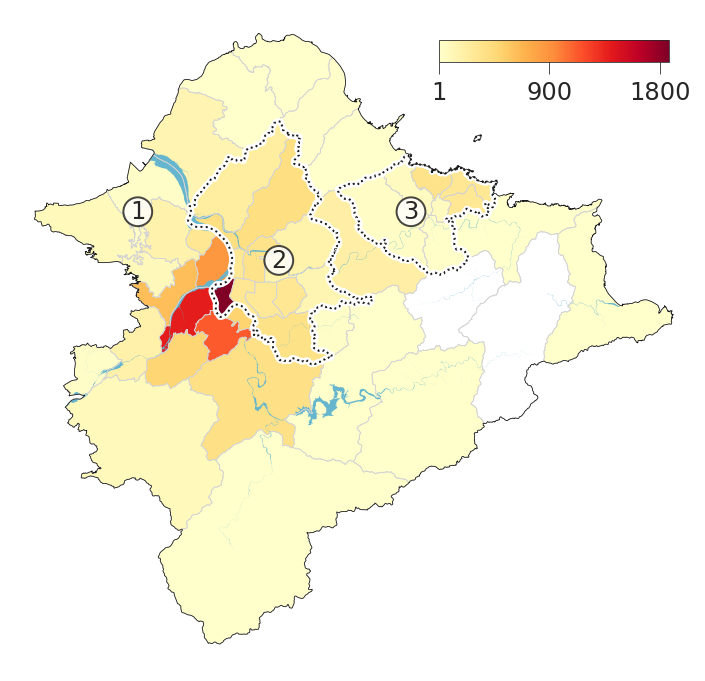

In [70]:
set_plot_style(False)

fig, ax = plt.subplots(figsize=(8, 6))
import matplotlib.colors as colors

vmax = np.max(gdf_cases['n'].dropna().values)

def truncate_colormap(cmap, minval=1.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
cmap = plt.get_cmap('YlOrRd')
pllt = truncate_colormap(cmap, 0, 1.0)

gdf_.boundary.plot(ax=ax, edgecolor='lightgrey', facecolor='none', lw=.4, alpha=1, ls='solid')
gdf_cases.loc[lambda d: d['n']>0].plot(column='n', axes=ax, edgecolor='none', lw=0, cmap = pllt, 
                                       #norm=plt.matplotlib.colors.LogNorm(vmin=1, vmax=vmax),
         categorical=False, legend=False, vmin=0, vmax=vmax)
# gdf_cases.loc[lambda d: ~(d['n']>0)].plot(ax=ax, edgecolor='C7', hatch="..", alpha=.3, facecolor='none', lw=0,
#                 cmap = pllt, categorical=False, legend=False)
gdf_inland_water__.loc[lambda d: d.RIVER_NAME.isin(['淡水河','基隆河','小坑口','新店溪','景美溪','新店溪第二號排水溝','大漢溪',
                                                    '北勢溪','南勢溪', '雙溪', '翡翠水庫'])].plot(ax=ax, edgecolor='k', lw=0, facecolor='C9', alpha=1)
# gdf_counties_outter.boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=.8, alpha=1, ls='dotted')
gdf_counties.loc[lambda d: d.county=='台北市'].boundary.plot(ax=ax, edgecolor='white', facecolor='none', lw=3, alpha=1, ls='solid')
gdf_counties.loc[lambda d: d.county=='台北市'].boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=1, alpha=1, ls='dotted')
gdf_counties.loc[lambda d: d.county=='基隆市'].boundary.plot(ax=ax, edgecolor='white', facecolor='none', lw=3, alpha=1, ls='solid')
gdf_counties.loc[lambda d: d.county=='基隆市'].boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=1, alpha=1, ls='dotted')
gdf_counties_outter.boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=.4, alpha=1)
ax.axis('off')

ax.annotate("2", (121.56, 25.06), ha='center',
    fontsize=12, bbox={"boxstyle" : "circle", "facecolor": 'w', "edgecolor":"k", "pad": 0.1, "alpha": .8})
ax.annotate("3", (121.71, 25.11), ha='center',
    fontsize=12, bbox={"boxstyle" : "circle", "facecolor": 'w', "edgecolor":"k", "pad": 0.1, "alpha": .8})
ax.annotate("1", (121.4, 25.11), ha='center',
    fontsize=12, bbox={"boxstyle" : "circle", "facecolor": 'w', "edgecolor":"k", "pad": 0.1, "alpha": .8})

cax = fig.add_axes([.59, 0.825, 0.2, 0.025])
# sm = plt.cm.ScalarMappable(cmap=pllt, norm=plt.matplotlib.colors.LogNorm(vmin=1, vmax=vmax)); sm._A = []
sm = plt.cm.ScalarMappable(cmap=pllt, norm = matplotlib.colors.Normalize(vmin=1, vmax=vmax)); sm._A = []
# formatter = matplotlib.ticker.LogFormatter(10, labelOnlyBase=False) 
cbr = fig.colorbar(sm, cax=cax, ticks=[1, 900, 1800], orientation='horizontal',)
cbr.ax.tick_params(width = .4)
cbr.outline.set_linewidth(.4)

ax.set_ylim(24.65,25.32); ax.set_xlim(121.26,122.02);

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mapA.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mapA.pdf", format='pdf',bbox_inches='tight');

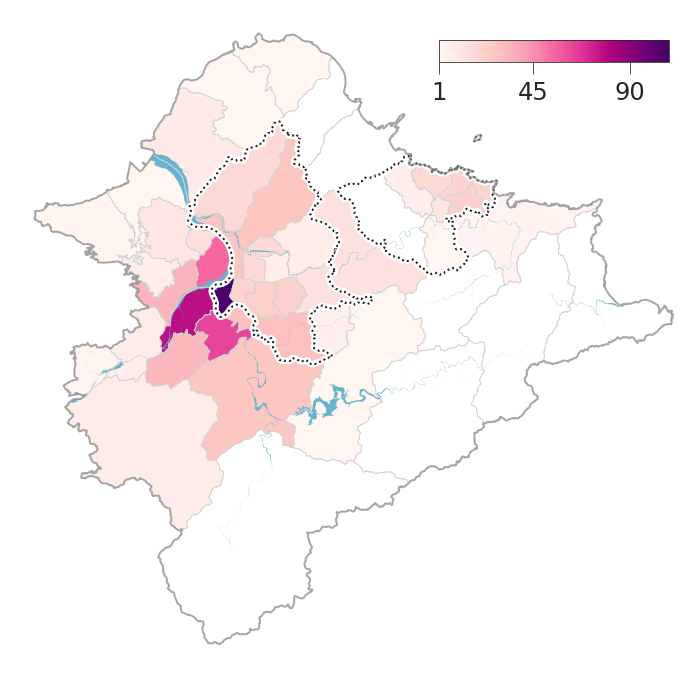

In [71]:
set_plot_style(False)

fig, ax = plt.subplots(figsize=(8, 6))

vmax_ = np.max(gdf_cases['n_deaths'].dropna().values)

arr_ = np.linspace(0, 50, 100).reshape((10, 10))
cmap_ = plt.get_cmap('RdPu')
pllt_ = truncate_colormap(cmap_, 0, 1.0)

gdf_.boundary.plot(ax=ax, edgecolor='lightgrey', facecolor='none', lw=.4, alpha=1, ls='solid')
gdf_cases.loc[lambda d: d['n_deaths']>0].plot(column='n_deaths', axes=ax, edgecolor='none', lw=0, cmap = pllt_, 
         categorical=False, legend=False, vmin=0, vmax=vmax_)
gdf_inland_water__.loc[lambda d: d.RIVER_NAME.isin(['淡水河','基隆河','小坑口','新店溪','景美溪','新店溪第二號排水溝','大漢溪',
                                                    '北勢溪','南勢溪', '雙溪', '翡翠水庫'])].plot(ax=ax, edgecolor='k', lw=0, facecolor='C9', alpha=1)
# gdf_counties_outter.boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=.4, alpha=1, ls='dashed')
gdf_counties.loc[lambda d: d.county=='台北市'].boundary.plot(ax=ax, edgecolor='white', facecolor='none', lw=3, alpha=1, ls='solid')
gdf_counties.loc[lambda d: d.county=='台北市'].boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=1, alpha=1, ls='dotted')
gdf_counties.loc[lambda d: d.county=='基隆市'].boundary.plot(ax=ax, edgecolor='white', facecolor='none', lw=3, alpha=1, ls='solid')
gdf_counties.loc[lambda d: d.county=='基隆市'].boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=1, alpha=1, ls='dotted')
gdf_counties_outter.boundary.plot(ax=ax, edgecolor='C7', facecolor='none', lw=1., alpha=.7)
ax.axis('off')

cax = fig.add_axes([.59, 0.825, 0.2, 0.025])
# sm = plt.cm.ScalarMappable(cmap=pllt_, norm=plt.matplotlib.colors.LogNorm(vmin=1, vmax=vmax_)); sm._A = []
sm = plt.cm.ScalarMappable(cmap=pllt_, norm = matplotlib.colors.Normalize(vmin=1, vmax=vmax_)); sm._A = []
# formatter = matplotlib.ticker.LogFormatter(5, labelOnlyBase=False) 
cbr = fig.colorbar(sm, cax=cax, ticks=[1,45,90], orientation='horizontal',)
# cbr.ax.set_xticklabels(['1', '5', '50'])
cbr.ax.tick_params(width = .4)
cbr.outline.set_linewidth(.4)
cbr.ax.minorticks_off()

ax.set_ylim(24.65,25.32); ax.set_xlim(121.26,122.02);

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mapB.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mapB.pdf", format='pdf',bbox_inches='tight');

In [72]:
Df_cases = pd.DataFrame(gdf_cases.loc[:,['county','district','n','n_deaths']])
Df_cases['n_clr'] = [pllt(x/vmax) for x in Df_cases['n']]
Df_cases[:5]

,county,district,n,n_deaths,n_clr
0,基隆市,暖暖區,25,1,"(1.0, 0.994476694484022, 0.7864985865164983, 1.0)"
1,台北市,大安區,296,22,"(0.9990510437162178, 0.9104326390302373, 0.587..."
2,台北市,文山區,372,29,"(0.9977917995341159, 0.8852477553881991, 0.534..."
3,新北市,永和區,503,29,"(0.996078431372549, 0.8315478662053056, 0.4418..."
4,新北市,新店區,379,26,"(0.9976962706651288, 0.8833371780084583, 0.530..."


## All Taiwan

In [73]:
gdf_cases_twn = gdf.merge(df_cases,how='left').merge(df_deaths,how='left')
gdf_cases_twn['n'] = [int(x) if x>0 else 0 for x in gdf_cases_twn['n']]
gdf_cases_twn['n_deaths'] = [int(x) if x>0 else 0 for x in gdf_cases_twn['n_deaths']]
gdf_cases_twn = gdf_cases_twn.drop(['district_eng'],1).dissolve(by='county', aggfunc='sum').reset_index()
gdf_cases_twn[:5]

,county,geometry,n,n_deaths
0,南投縣,"POLYGON ((120.81371 23.60095, 120.81312 23.600...",37,0
1,台中市,"POLYGON ((120.65566 24.03067, 120.65190 24.028...",468,25
2,台北市,"POLYGON ((121.53183 25.00869, 121.53172 25.008...",4960,315
3,台南市,"POLYGON ((120.26957 22.89681, 120.26937 22.896...",42,1
4,台東縣,"MULTIPOLYGON (((120.89188 22.29124, 120.89185 ...",22,1


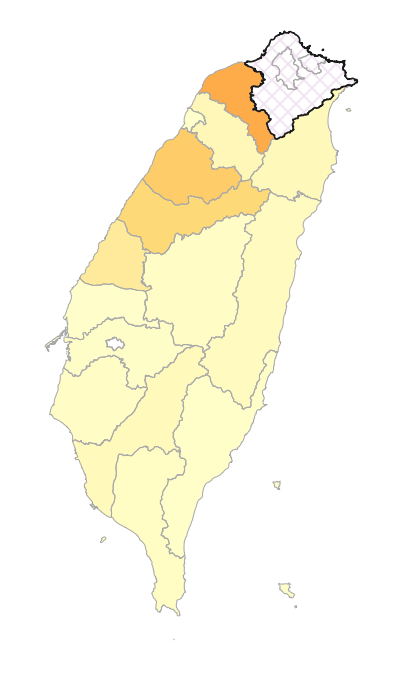

In [74]:
set_plot_style(False)

fig, ax = plt.subplots(figsize=(8, 6))

gdf_counties.boundary.plot(ax=ax, edgecolor='darkgrey', facecolor='none', lw=.5, alpha=1, ls='solid')
gdf_cases_twn_ = gdf_cases_twn.copy()
gdf_cases_twn_['n'] = [x if x<vmax else vmax for x in gdf_cases_twn_.n]

gdf_cases_twn_.loc[lambda d: (d['n']>0) & (~d.county.isin(['基隆市','台北市','新北市']))].\
    plot(column='n', axes=ax, edgecolor='none', lw=0, cmap = pllt, 
         #norm=plt.matplotlib.colors.LogNorm(vmin=1, vmax=vmax),
         categorical=False, legend=False, vmin=0, vmax=vmax)
gdf_cases_twn_.loc[lambda d: (d.county.isin(['基隆市','台北市','新北市']))].plot(ax=ax, alpha=.1, facecolor='w', hatch="xxx", edgecolor='purple', lw=0,
                categorical=False, legend=False)
# gdf_cases_twn_.loc[lambda d: ~(d['n']>0)].plot(ax=ax, edgecolor='lightgrey', hatch="..", alpha=.3, facecolor='none', lw=0,
#                 cmap = pllt, categorical=False, legend=False)
gdf_counties_outter.boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=.8, ls='solid')
ax.axis('off')

ax.set_ylim(21.6,25.4); ax.set_xlim(119.8,122.2);

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mapC.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mapC.pdf", format='pdf',bbox_inches='tight');

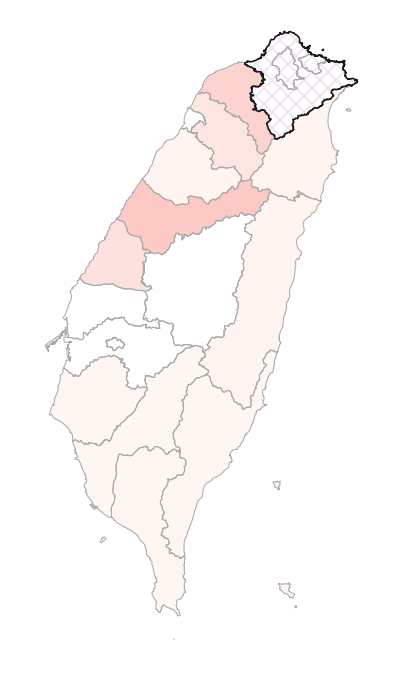

In [75]:
set_plot_style(False)

fig, ax = plt.subplots(figsize=(8, 6))

vmax_ = np.max(gdf_cases['n_deaths'].dropna().values)

gdf_counties.boundary.plot(ax=ax, edgecolor='darkgrey', facecolor='none', lw=.5, alpha=1, ls='solid')
gdf_cases_twn_ = gdf_cases_twn.copy()
gdf_cases_twn_['n'] = [x if x<vmax else vmax for x in gdf_cases_twn_.n]

gdf_cases_twn_.loc[lambda d: (d['n_deaths']>0) & (~d.county.isin(['基隆市','台北市','新北市']))].plot(column='n_deaths', axes=ax, edgecolor='none', lw=0, cmap = pllt_, 
         categorical=False, legend=False, vmin=0, vmax=vmax_)
gdf_cases_twn_.loc[lambda d: (d.county.isin(['基隆市','台北市','新北市']))].plot(ax=ax, alpha=.1, facecolor='w', hatch="xxx", edgecolor='purple', lw=0,
                categorical=False, legend=False)
gdf_counties_outter.boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=.8, ls='solid')
ax.axis('off')

ax.set_ylim(21.6,25.4); ax.set_xlim(119.8,122.2);

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mapD.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mapD.pdf", format='pdf',bbox_inches='tight');

In [76]:
Df_cases_counties = pd.DataFrame(gdf_cases_twn.loc[:,['county','n','n_deaths']])
Df_cases_counties['n_clr'] = [pllt(x/vmax) for x in Df_cases_counties['n']]
Df_cases_counties[:5]

,county,n,n_deaths,n_clr
0,南投縣,37,0,"(1.0, 0.9893181355587218, 0.7738887758102088, ..."
1,台中市,468,25,"(0.9961949476445712, 0.8527603410452993, 0.467..."
2,台北市,4960,315,"(0.5019607843137255, 0.0, 0.14901960784313725,..."
3,台南市,42,1,"(1.0, 0.9893181355587218, 0.7738887758102088, ..."
4,台東縣,22,1,"(1.0, 0.994476694484022, 0.7864985865164983, 1.0)"


# Epicurve 1

In [77]:
datemin = pd.to_datetime("2021-04-29")
datemax = truncation_date
[datemin, datemax]

[Timestamp('2021-04-29 00:00:00'), Timestamp('2021-08-25 00:00:00')]

In [78]:
Df['ConfirmDay'] = [np.timedelta64(t-datemin,'D').astype('int64') for t in Df.Confirm]

In [79]:
Df_ = Df.loc[lambda d: d.county.isin(['基隆市','新北市','台北市'])]
n_infections, edges = np.histogram(Df_.ConfirmDay.values, bins=xmax+1, range=(0, xmax+1))
timepoints = edges[:-1]
x = np.r_[timepoints[:1],timepoints,timepoints[-1:]]
y = np.r_[0,n_infections,0]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Verdana
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Verdana


新北市
台北市
基隆市


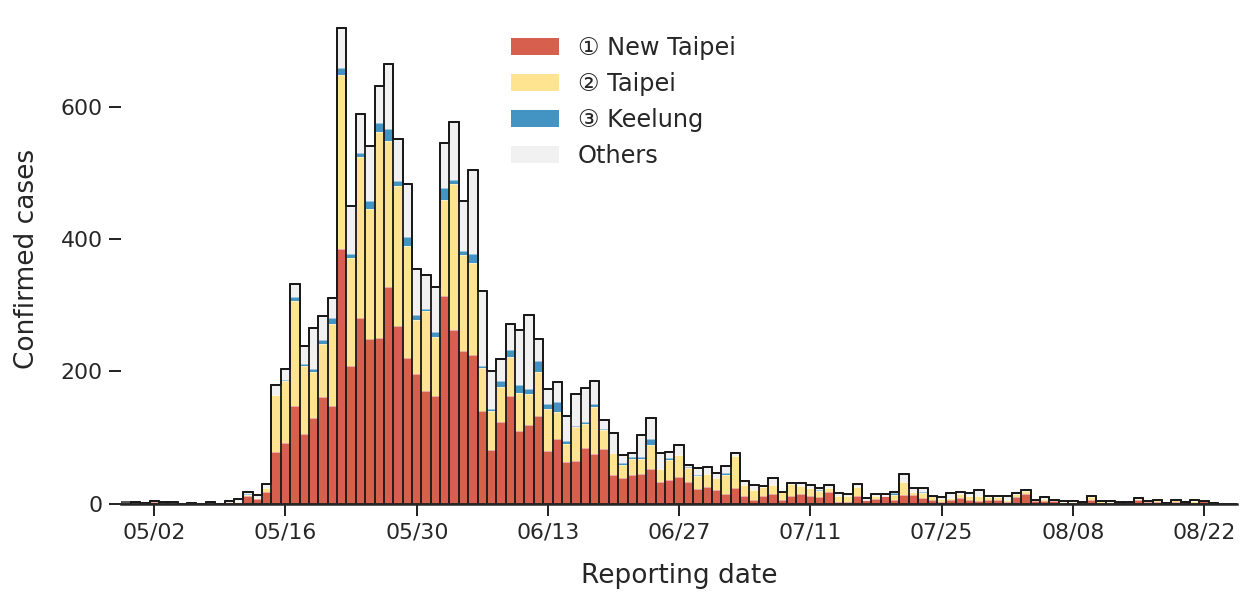

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4.5); 

xmax = np.timedelta64(datemax-datemin,'D').astype('int64')#np.max(df_onset.dropna().delta_onset.values)
bins_number = int(xmax)+2
ymax = 740

clrs_ = ["#d6604d", "#fee391", "#4393c3", "lightgrey"] # via https://nanx.me/ggsci/index.html
lbs = ["① New Taipei", "② Taipei", "③ Keelung", "Others"]

# first we show infections in Northern Taiwan
Df_ = Df.loc[lambda d: d.county.isin(['基隆市','新北市','台北市'])]
Df_cases_counties_ = Df_cases_counties.loc[lambda d: (d.county.isin(['基隆市','台北市','新北市']))].sort_values('n', ascending=False).reset_index(drop=True)
n_infections, edges = np.histogram(Df_.ConfirmDay.values, bins=xmax+1, range=(0, xmax+1))
n_infections_bottom = [0]*len(n_infections)
for idx in range(len(Df_cases_counties_)):
    county_ = Df_cases_counties_.loc[idx, 'county']
    print(county_)
    clr_ = clrs_[idx]
    n_infections, edges = np.histogram(Df_.loc[lambda d: d.county==county_].ConfirmDay.values, bins=xmax+1, range=(0, xmax+1))
    ax.fill_between(edges[:-1]+0.5, y1=n_infections_bottom, y2=n_infections_bottom+n_infections, lw = 0, step='pre', color = clr_, 
                    zorder=-4, alpha=1, label = lbs[idx])
    ax.step(edges[:-1]+0.5, n_infections_bottom+n_infections, lw = .4, where='pre', color = 'w', zorder=-4, alpha=.6)
    n_infections_bottom = n_infections_bottom + n_infections
# ax.fill_between(edges[:-1]+0.5, [0]*len(n_infections_bottom), n_infections_bottom, lw = 0, step='pre', color = 'w', zorder=-4.2)
ax.fill_between(edges[:-1]+0.5, [0]*len(n_infections_bottom), n_infections_bottom, lw = 0, step='pre', color = 'w', zorder=-4.2)

n_infections, edges = np.histogram(Df_.ConfirmDay.values, bins=xmax+1, range=(0, xmax+1))
timepoints = edges[:-1]
x = np.r_[timepoints[:1],timepoints,timepoints[-1:]]
y = np.r_[0,n_infections,0]

n_infections, edges = np.histogram(Df.ConfirmDay.values, bins=xmax+1, range=(0, xmax+1))
y = np.r_[0,n_infections,0]
ax.bar(edges[:-1], n_infections, lw = 0, width = (edges[1]-edges[0]), edgecolor = 'w', 
       facecolor=clrs_[-1], zorder=-4.5, alpha=.3, label=lbs[-1])
ax.step(x+0.5, y, lw = 1, where='pre', color = 'k', zorder=-3)

ax.bar(edges[:-1], n_infections, lw = .9, width = (edges[1]-edges[0]), edgecolor = 'k', 
       facecolor="none", zorder=-0.5, alpha=.8)

xstep = 5
xtks = np.arange(3,max(timepoints)+1,14)
ax.set_xlim(-.5,xmax+0.55)
ax.set_ylim(0,ymax)
ax.set_xticks(xtks)
ax.set_xticklabels([(datemin+np.timedelta64(int(x),'D')).strftime("%m/%d") for x in xtks],fontsize=11);

ax.set_xlabel('Reporting date',labelpad=10)
ax.set_ylabel('Confirmed cases',labelpad=10)

ytks = np.arange(0,800,200)
ax.set_yticks(ytks)
ax.set_yticklabels(np.r_[["0"],ytks[1:]],fontsize=11);
plt.legend(frameon=False, fontsize=12, bbox_to_anchor=(.57,1.0), loc=1)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/epicurve.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/epicurve.pdf", format='pdf',bbox_inches='tight');

新北市
台北市
基隆市


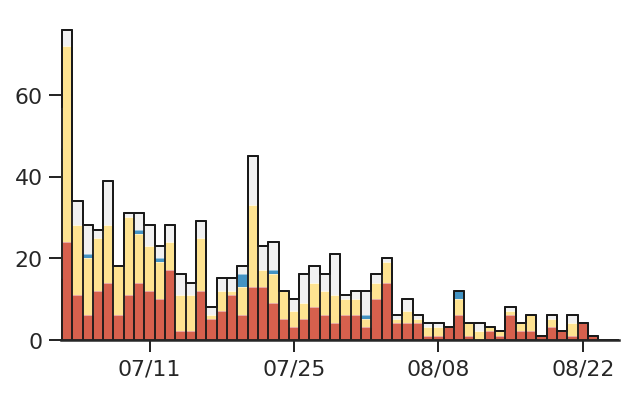

In [81]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3); 

xmax = np.timedelta64(datemax-datemin,'D').astype('int64')#np.max(df_onset.dropna().delta_onset.values)
xmin = np.timedelta64(pd.to_datetime('2021-07-04')-datemin,'D').astype('int64')#np.max(df_onset.dropna().delta_onset.values)

bins_number = int(xmax)+2
ymax = 80

clrs_ = ["#d6604d", "#fee391", "#4393c3", "lightgrey"] # via https://nanx.me/ggsci/index.html
lbs = ["① New Taipei", "② Taipei", "③ Keelung", "Others"]

# first we show infections in Northern Taiwan
Df_ = Df.loc[lambda d: d.county.isin(['基隆市','新北市','台北市'])]
Df_cases_counties_ = Df_cases_counties.loc[lambda d: (d.county.isin(['基隆市','台北市','新北市']))].sort_values('n', ascending=False).reset_index(drop=True)
n_infections, edges = np.histogram(Df_.ConfirmDay.values, bins=xmax+1, range=(0, xmax+1))
n_infections_bottom = [0]*len(n_infections)
for idx in range(len(Df_cases_counties_)):
    county_ = Df_cases_counties_.loc[idx, 'county']
    print(county_)
    clr_ = clrs_[idx]
    n_infections, edges = np.histogram(Df_.loc[lambda d: d.county==county_].ConfirmDay.values, bins=xmax+1, range=(0, xmax+1))
    ax.fill_between(edges[:-1]+0.5, y1=n_infections_bottom, y2=n_infections_bottom+n_infections, lw = 0, step='pre', color = clr_, 
                    zorder=-4, alpha=1, label = lbs[idx])
    ax.step(edges[:-1]+0.5, n_infections_bottom+n_infections, lw = .4, where='pre', color = 'w', zorder=-4, alpha=.6)
    n_infections_bottom = n_infections_bottom + n_infections
# ax.fill_between(edges[:-1]+0.5, [0]*len(n_infections_bottom), n_infections_bottom, lw = 0, step='pre', color = 'w', zorder=-4.2)
ax.fill_between(edges[:-1]+0.5, [0]*len(n_infections_bottom), n_infections_bottom, lw = 0, step='pre', color = 'w', zorder=-4.2)

n_infections, edges = np.histogram(Df_.ConfirmDay.values, bins=xmax+1, range=(0, xmax+1))
timepoints = edges[:-1]
x = np.r_[timepoints[:1],timepoints,timepoints[-1:]]
y = np.r_[0,n_infections,0]

n_infections, edges = np.histogram(Df.ConfirmDay.values, bins=xmax+1, range=(0, xmax+1))
y = np.r_[0,n_infections,0]
ax.bar(edges[:-1], n_infections, lw = 0, width = (edges[1]-edges[0]), edgecolor = 'w', 
       facecolor=clrs_[-1], zorder=-4.5, alpha=.3, label=lbs[-1])
ax.step(x+0.5, y, lw = 1, where='pre', color = 'k', zorder=-3)

ax.bar(edges[:-1], n_infections, lw = .9, width = (edges[1]-edges[0]), edgecolor = 'k', 
       facecolor="none", zorder=-0.5, alpha=.8)

xstep = 5
xtks = np.arange(3,max(timepoints)+1,14)
ax.set_xticks(xtks)
ax.set_xticklabels([(datemin+np.timedelta64(int(x),'D')).strftime("%m/%d") for x in xtks],fontsize=11);
ax.set_xlim(xmin-1.55,xmax+0.55)


ytks = np.arange(0,80,20)
ax.set_yticks(ytks)
ax.set_yticklabels(np.r_[["0"],ytks[1:]],fontsize=11);
ax.set_ylim(0,ymax)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/epicurve_small.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/epicurve_small.pdf", format='pdf',bbox_inches='tight');

# Epicurve 2

In [82]:
bins = [0, 17, 35, 65, max([np.max(Df['Age']),110])]
Df['age_group'] = pd.cut(Df['Age'], bins=bins, right=False)

Df_ = Df.groupby(['county','age_group'])['ID'].agg(['count']).reset_index().pivot_table(values='count', index='county', columns='age_group')
Df_.to_csv('incidence_by_age_group_and_county-'+truncation_date.strftime("%Y%m%d")+'.csv',index=True)
Df_

age_group,"[0, 17)","[17, 35)","[35, 65)","[65, 110)"
county,,,,
南投縣,1,8,18,10
台中市,25,67,80,30
台北市,225,642,2629,1354
台南市,7,7,21,14
台東縣,3,3,12,4
嘉義市,1,0,6,3
嘉義縣,3,4,15,10
基隆市,18,54,160,83
宜蘭縣,12,22,47,17


In [83]:
Df_ = Df.groupby(['age_group','Confirm'])['ID'].agg(['count']).reset_index().pivot_table(values='count', index='Confirm', columns='age_group')
Df_[:5]

age_group,"[0, 17)","[17, 35)","[35, 65)","[65, 110)"
Confirm,,,,
2021-04-23,1,0,1,0
2021-04-24,0,0,1,0
2021-04-25,0,1,1,0
2021-04-26,0,0,2,0
2021-04-27,0,0,1,0


In [84]:
clmns = ['Children and youth', 'Young adults', 'Middle-aged adults', 'Older adults']
Df_.columns = clmns
Df_ = Df_.reset_index()
Df_['ConfirmDay'] = [np.timedelta64(t-datemin,'D').astype('int64') for t in Df_.Confirm]
Df_[:5]

,Confirm,Children and youth,Young adults,Middle-aged adults,Older adults,ConfirmDay
0,2021-04-23,1,0,1,0,-6
1,2021-04-24,0,0,1,0,-5
2,2021-04-25,0,1,1,0,-4
3,2021-04-26,0,0,2,0,-3
4,2021-04-27,0,0,1,0,-2


In [85]:
Df_ = Df_.merge(pd.DataFrame({'ConfirmDay': np.arange(min(Df_.ConfirmDay),max(Df_.ConfirmDay)+1)}), how='right').fillna(0)
for x in clmns:
    Df_[x] = [int(y) for y in Df_[x]]
Df_['Confirm'] = [pd.to_datetime(x) for x in Df_.Confirm]
Df_[:5]

,Confirm,Children and youth,Young adults,Middle-aged adults,Older adults,ConfirmDay
0,2021-04-23,1,0,1,0,-6
1,2021-04-24,0,0,1,0,-5
2,2021-04-25,0,1,1,0,-4
3,2021-04-26,0,0,2,0,-3
4,2021-04-27,0,0,1,0,-2


Older adults
Middle-aged adults
Young adults
Children and youth


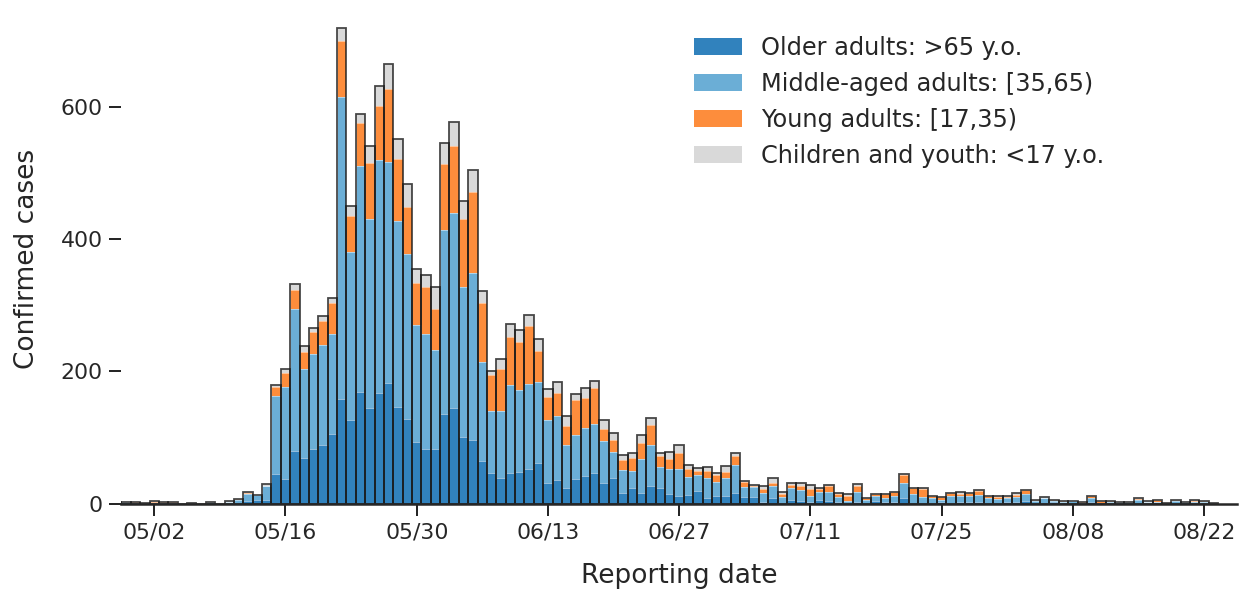

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4.5); 

clrs_ = ["#3182bd", "#6baed6", "#fd8d3c", "#d9d9d9"] # via https://nanx.me/ggsci/index.html

xmax = np.timedelta64(datemax-datemin,'D').astype('int64')#np.max(df_onset.dropna().delta_onset.values)
bins_number = int(xmax)+2
ymax = 740

n_infections_bottom = [0]*len(Df_)
lbs = clmns
age_groups_ = ['<17 y.o.', '[17,35)', '[35,65)', '>65 y.o.']
lbs = [x+': '+y for x,y in zip(lbs,age_groups_)][::-1]
for idx, age_group in enumerate(clmns[::-1]):
    print(age_group)
    n_infections = Df_.loc[:,age_group].values
    edges = Df_.ConfirmDay+0.5
    ax.fill_between(edges, y1=n_infections_bottom, y2=n_infections_bottom+n_infections, lw = 0, 
                    step='pre', color = clrs_[idx], 
                    zorder=-4, alpha=1, label = lbs[idx])
    ax.step(edges, n_infections_bottom+n_infections, lw = .4, where='pre', color = 'w', zorder=-3, alpha=.6)
    n_infections_bottom = n_infections_bottom + n_infections

ax.bar(edges - 0.5, n_infections_bottom, lw = .9, width = (edges[1]-edges[0]), edgecolor = 'k', 
       facecolor="none", zorder=-0.5, alpha=.8)

xstep = 5
xtks = np.arange(3,max(timepoints)+1,14)
ax.set_xlim(-.5,xmax+0.55)
ax.set_xticks(xtks)
ax.set_xticklabels([(datemin+np.timedelta64(int(x),'D')).strftime("%m/%d") for x in xtks],fontsize=11);
ax.set_ylim(0,ymax)

ax.set_xlabel('Reporting date',labelpad=10)
ax.set_ylabel('Confirmed cases',labelpad=10)

ytks = np.arange(0,800,200)
ax.set_yticks(ytks)
ax.set_yticklabels(np.r_[["0"],ytks[1:]],fontsize=11);
plt.legend(frameon=False, fontsize=12, loc=1, bbox_to_anchor=(.9, 1))

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/epicurve_age_groups.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/epicurve_age_groups.pdf", format='pdf',bbox_inches='tight');

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Verdana


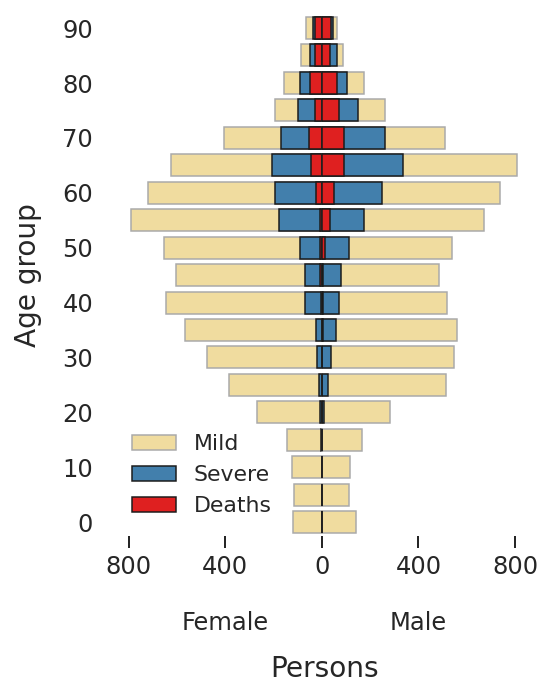

In [87]:
# age pyramid

fig, ax = plt.subplots()
fig.set_size_inches(3.8,4.8); 

clrs_ = ["#fee391", "#3182bd", "red"]

bins = np.r_[np.arange(0, 95, 5),[110]]
Df['AgeGroup'] = pd.cut(Df['Age'], bins=bins, right=False, labels=bins[:-1])
Df_deaths['AgeGroup'] = pd.cut(Df_deaths['Age'], bins=bins, right=False, labels=bins[:-1])


Df_ = Df.groupby(['AgeGroup','Gender'])['ID'].agg(['count']).reset_index()\
    .pivot_table(values='count', columns='Gender', index='AgeGroup').reset_index()
Df_severe = Df.loc[lambda d: d.Severity!='mild'].groupby(['AgeGroup','Gender'])['ID'].agg(['count']).reset_index()\
    .pivot_table(values='count', columns='Gender', index='AgeGroup').reset_index()
Df_deaths_age = Df_deaths.groupby(['AgeGroup','Gender'])['ID'].agg(['count']).reset_index()\
    .pivot_table(values='count', columns='Gender', index='AgeGroup').reset_index()
# Df_['AgeGroup'] = [int(x) for x in Df_.AgeGroup]
Df_severe = Df_severe.sort_values('AgeGroup', ascending=False)
Df_ = Df_.sort_values('AgeGroup', ascending=False)
Df_severe['女'] = -Df_severe.女
Df_deaths_age['女'] = -Df_deaths_age.女
Df_['女'] = -Df_.女

sns.barplot(x='女', y='AgeGroup', data=Df_, dodge=False, order=bins[:-1][::-1], 
            color=clrs_[0], edgecolor='darkgrey', lw=0.75, ax=ax)
sns.barplot(x='女', y='AgeGroup', data=Df_severe, dodge=False, order=bins[:-1][::-1], 
            color=clrs_[1], edgecolor='k', lw=0.75, ax=ax)
sns.barplot(x='女', y='AgeGroup', data=Df_deaths_age, dodge=False, order=bins[:-1][::-1], 
            color=clrs_[2], edgecolor='k', lw=0.75, ax=ax)
sns.barplot(x='男', y='AgeGroup', data=Df_, dodge=False, label='Mild',
            color=clrs_[0], edgecolor='darkgrey', lw=0.75, order=bins[:-1][::-1], ax=ax)
sns.barplot(x='男', y='AgeGroup', data=Df_severe, dodge=False, label='Severe',
            color=clrs_[1], edgecolor='k', lw=0.75, order=bins[:-1][::-1], ax=ax)
sns.barplot(x='男', y='AgeGroup', data=Df_deaths_age, dodge=False, order=bins[:-1][::-1], 
            color=clrs_[2], edgecolor='k', lw=0.75, ax=ax, label='Deaths')

ax.set_xlabel('Persons',labelpad=10, fontsize=14)
# ax.set_xlabel('Confirmed cases as of '+truncation_date.strftime("%Y/%m/%d"),labelpad=10)
ax.set_ylabel('Age group',labelpad=10, fontsize=14)

xtks = [-800,-400,-400+1e-5,0,400,400+1e-5,800]
ax.set_xticks(xtks)
xtklbs = [800,400,"\n\nFemale",0,400,"\n\nMale",800]
ax.set_xticklabels(xtklbs)

ytks = bins[:-1][::-1]
# ax.set_yticks(ytks)
ax.set_yticklabels([x if x%10==0 else "" for x in ytks])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.spines['bottom'].set_visible(False);

plt.legend(fontsize=11, frameon=False)

ax.yaxis.set_ticks_position('none'); 

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/age_pyramid.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/age_pyramid.pdf", format='pdf',bbox_inches='tight');

# Epicurve 2 - deaths

In [88]:
bins = [0, 17, 35, 65, max([np.max(Df_deaths['Age']),110])]
Df_deaths['age_group'] = pd.cut(Df_deaths['Age'], bins=bins, right=False)

Df_ = Df_deaths.groupby(['county','age_group'])['ID'].agg(['count']).reset_index().pivot_table(values='count', index='county', columns='age_group')
Df_.to_csv('deaths_by_age_group_and_county-'+truncation_date.strftime("%Y%m%d")+'.csv',index=True)
Df_

age_group,"[0, 17)","[17, 35)","[35, 65)","[65, 110)"
county,,,,
台中市,0,0,1,4
台北市,0,1,64,242
台南市,0,0,0,1
台東縣,0,0,0,1
基隆市,0,0,4,21
宜蘭縣,0,0,0,2
屏東縣,0,0,0,1
彰化縣,0,0,4,9
新北市,0,0,80,315


In [89]:
Df_ = Df_deaths.groupby(['age_group','Death'])['ID'].agg(['count']).reset_index().pivot_table(values='count', index='Death', columns='age_group')
Df_[:5]

age_group,"[0, 17)","[17, 35)","[35, 65)","[65, 110)"
Death,,,,
2021-05-17,0,0,1,2
2021-05-19,0,0,0,1
2021-05-20,0,0,0,6
2021-05-21,0,0,3,5
2021-05-22,0,0,3,4


In [90]:
clmns = ['Children and youth', 'Young adults', 'Middle-aged adults', 'Older adults']
Df_.columns = clmns
Df_ = Df_.reset_index()
Df_['DeathDay'] = [np.timedelta64(t-datemin,'D').astype('int64') for t in Df_.Death]
Df_[:5]

,Death,Children and youth,Young adults,Middle-aged adults,Older adults,DeathDay
0,2021-05-17,0,0,1,2,18
1,2021-05-19,0,0,0,1,20
2,2021-05-20,0,0,0,6,21
3,2021-05-21,0,0,3,5,22
4,2021-05-22,0,0,3,4,23


In [91]:
Df_ = Df_.merge(pd.DataFrame({'DeathDay': np.arange(min(Df_.DeathDay)-1,max(Df_.DeathDay)+1)}), how='right').fillna(0)
for x in clmns:
    Df_[x] = [int(y) for y in Df_[x]]
Df_['Death'] = [datemin+pd.DateOffset(x,'days') for x in Df_.DeathDay]
Df_[:10]

,Death,Children and youth,Young adults,Middle-aged adults,Older adults,DeathDay
0,2021-05-16,0,0,0,0,17
1,2021-05-17,0,0,1,2,18
2,2021-05-18,0,0,0,0,19
3,2021-05-19,0,0,0,1,20
4,2021-05-20,0,0,0,6,21
5,2021-05-21,0,0,3,5,22
6,2021-05-22,0,0,3,4,23
7,2021-05-23,0,0,2,7,24
8,2021-05-24,0,0,1,12,25
9,2021-05-25,0,0,6,11,26


Older adults
Middle-aged adults
Young adults
Children and youth


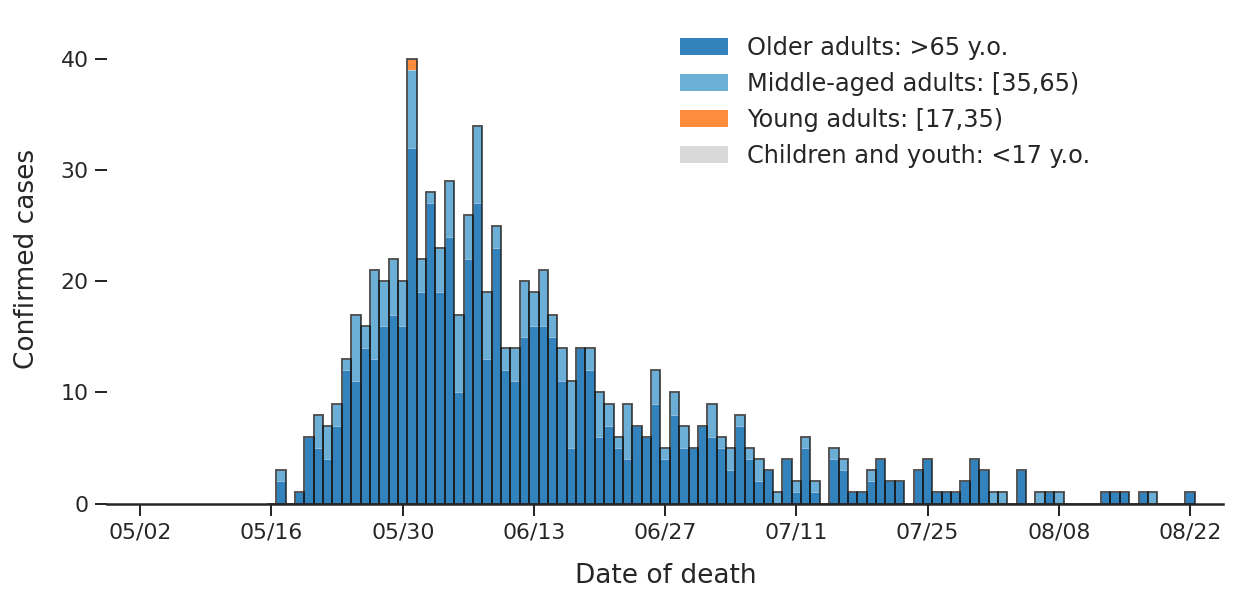

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4.5); 

clrs_ = ["#3182bd", "#6baed6", "#fd8d3c", "#d9d9d9"] # via https://nanx.me/ggsci/index.html

xmax = np.timedelta64(datemax-datemin,'D').astype('int64')#np.max(df_onset.dropna().delta_onset.values)
bins_number = int(xmax)+2
ymax = 44

n_infections_bottom = [0]*len(Df_)
lbs = clmns
age_groups_ = ['<17 y.o.', '[17,35)', '[35,65)', '>65 y.o.']
lbs = [x+': '+y for x,y in zip(lbs,age_groups_)][::-1]
for idx, age_group in enumerate(clmns[::-1]):
    print(age_group)
    n_infections = Df_.loc[:,age_group].values
    edges = Df_.DeathDay+0.5
    ax.fill_between(edges, y1=n_infections_bottom, y2=n_infections_bottom+n_infections, lw = 0, 
                    step='pre', color = clrs_[idx], 
                    zorder=-4, alpha=1, label = lbs[idx])
    ax.step(edges, n_infections_bottom+n_infections, lw = .4, where='pre', color = 'w', zorder=-3, alpha=.6)
    n_infections_bottom = n_infections_bottom + n_infections

ax.bar(edges - 0.5, n_infections_bottom, lw = .9, width = (edges[1]-edges[0]), edgecolor = 'k', 
       facecolor="none", zorder=-0.5, alpha=.8)

xstep = 5
xtks = np.arange(3,max(timepoints)+1,14)
ax.set_xlim(-.5,xmax+0.55)
ax.set_xticks(xtks)
ax.set_xticklabels([(datemin+np.timedelta64(int(x),'D')).strftime("%m/%d") for x in xtks],fontsize=11);

ax.set_xlabel('Date of death',labelpad=10)
ax.set_ylabel('Confirmed cases',labelpad=10)

ytks = np.arange(0,ymax+10,10)
ax.set_yticks(ytks)
ax.set_yticklabels(np.r_[["0"],ytks[1:]],fontsize=11);
plt.legend(frameon=False, fontsize=12, loc=1, bbox_to_anchor=(.9, 1))
ax.set_ylim(0,ymax)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/epicurve_deaths_age_groups.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/epicurve_deaths_age_groups.pdf", format='pdf',bbox_inches='tight');

# Google mobility data

In [90]:
datemin_plt = pd.to_datetime('2021-04-20')#datemin
datemax_plt = pd.to_datetime('2021-08-11')#datemax
datemin_mobility = pd.to_datetime('2021-04-01')
datemax_mobility = pd.to_datetime('2021-08-25')

xmin_mobility = np.timedelta64(datemin_plt-datemin_mobility,'D').astype('int64')
xmax_mobility = np.timedelta64(datemax_plt-datemin_mobility,'D').astype('int64')

In [91]:
import wget
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
# uncomment if you need to download the latest data
#filename = wget.download(url, out="../../data")
filename = '../../data/Global_Mobility_Report.csv'

In [92]:
googlemobilitydata = pd.read_csv(filename, low_memory=False).query('country_region=="Taiwan"')

In [93]:
googlemobilitydata.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [94]:
googlemobilitydata['date'] = pd.to_datetime(googlemobilitydata['date'])
googlemobilitydata_ = googlemobilitydata.loc[lambda d: (d.date>=datemin_mobility)&(d.date<=datemax_mobility)]

# Facebook data

In [95]:
facebookdata = pd.read_csv("../../data/Facebook/movement-range.txt", sep='\t', low_memory=False).loc[lambda d: d.country=='TWN']
facebookdata['ds'] = pd.to_datetime(facebookdata['ds'])
facebookdata[:5]

,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
3136348,2021-01-01,TWN,GADM,TWN.1.1_1,Kinmen,0.15271,0.16093,full_february,DAY_OF_WEEK
3136349,2021-01-02,TWN,GADM,TWN.1.1_1,Kinmen,0.17924,0.17074,full_february,DAY_OF_WEEK
3136350,2021-01-03,TWN,GADM,TWN.1.1_1,Kinmen,0.15238,0.17345,full_february,DAY_OF_WEEK
3136351,2021-01-04,TWN,GADM,TWN.1.1_1,Kinmen,0.11975,0.12182,full_february,DAY_OF_WEEK
3136352,2021-01-05,TWN,GADM,TWN.1.1_1,Kinmen,0.11396,0.13306,full_february,DAY_OF_WEEK


In [96]:
facebookdata_taipei = facebookdata.loc[lambda d: (d.ds>=datemin_mobility)&(d.ds<=datemax_mobility)&(d.polygon_name=='Taipei')]
facebookdata_xinbei = facebookdata.loc[lambda d: (d.ds>=datemin_mobility)&(d.ds<=datemax_mobility)&(d.polygon_name=='New Taipei')]

In [97]:
facebookdata.polygon_name.drop_duplicates().values

array(['Kinmen', 'Lienkiang', 'Kaohsiung', 'New Taipei', 'Taichung',
       'Tainan', 'Taipei', 'Penghu', 'Pingtung', 'Taitung', 'Taoyuan',
       'Yilan', 'Yulin', 'Changhua', 'Chiayi City', 'Chiayi County',
       'Hsinchu City', 'Hsinchu County', 'Hualien', 'Keelung', 'Miaoli',
       'Nantou'], dtype=object)

/home/andrei/anaconda/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/andrei/anaconda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1210: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(
/home/andrei/anaconda/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key

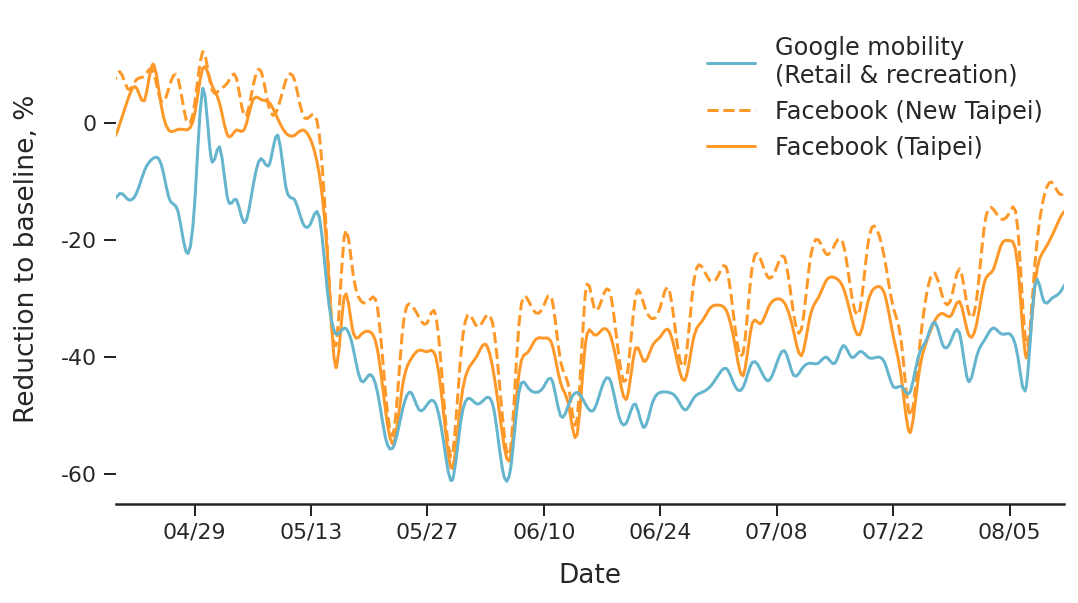

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5,4.5); 

clrs_ = ["C9", "#fe9929", "#E5614C99", "#97A1A799"] # via https://nanx.me/ggsci/index.html

# google mobility
x = [np.timedelta64(x-datemin_mobility,'D').astype('int64') for x in googlemobilitydata_['date'].values]
googlemobilitydata_['x'] = [np.timedelta64(x-datemin_mobility,'D').astype('int64') for x in googlemobilitydata_['date'].values]
x_ = np.linspace(0, np.max(x), 500)
df_y = googlemobilitydata_.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x', 'retail_and_recreation_percent_change_from_baseline']].\
    reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y.index, df_y.retail_and_recreation_percent_change_from_baseline, color=clrs_[0], lw=1.5, label="Google mobility\n(Retail & recreation)", zorder=2)

# Facebook data
x = [np.timedelta64(x-datemin_mobility,'D').astype('int64') for x in facebookdata_taipei['ds'].values]
facebookdata_xinbei['x'] = [np.timedelta64(x-datemin_mobility,'D').astype('int64') for x in facebookdata_xinbei.loc[:,'ds'].values]
df_y_facebook = facebookdata_xinbei.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x','all_day_bing_tiles_visited_relative_change']].\
    reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y_facebook.index, df_y_facebook.all_day_bing_tiles_visited_relative_change*100, color=clrs_[1], lw=1.5, linestyle='dashed', label="Facebook (New Taipei)", zorder=1)

x = [np.timedelta64(x-datemin_mobility,'D').astype('int64') for x in facebookdata_taipei['ds'].values]
facebookdata_taipei['x'] = [np.timedelta64(x-datemin_mobility,'D').astype('int64') for x in facebookdata_taipei.loc[:,'ds'].values]
df_y_facebook = facebookdata_taipei.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x','all_day_bing_tiles_visited_relative_change']].\
    reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y_facebook.index, df_y_facebook.all_day_bing_tiles_visited_relative_change*100, color=clrs_[1], lw=1.5, label="Facebook (Taipei)",zorder=1)

xstep = 5
xtks = np.arange(0,xmax_mobility+13,14)
ax.set_xticks(xtks)
ax.set_xticklabels([(datemin_mobility+np.timedelta64(int(x),'D')).strftime("%m/%d") for x in xtks],fontsize=11);
ax.set_xlim(xmin_mobility-.5,xmax_mobility+0.55)

ytks = [-60, -40, -20, 0]
# [plt.axhline(y=y_, lw=.4, color='k', linestyle='dotted', zorder=-100) for y_ in ytks]
ax.set_yticks(ytks)
ax.set_yticklabels(ytks,fontsize=11);
ax.set_xlabel('Date',labelpad=10)
ax.set_ylabel('Reduction to baseline, %',labelpad=10)
plt.legend(frameon=False,fontsize=12)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mobility.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mobility.pdf", format='pdf',bbox_inches='tight');

/home/andrei/anaconda/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/andrei/anaconda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1210: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(
/home/andrei/anaconda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1210: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(
/home/andrei/anaconda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1210: UserWarning: You are merging on int and float columns where the float values ar

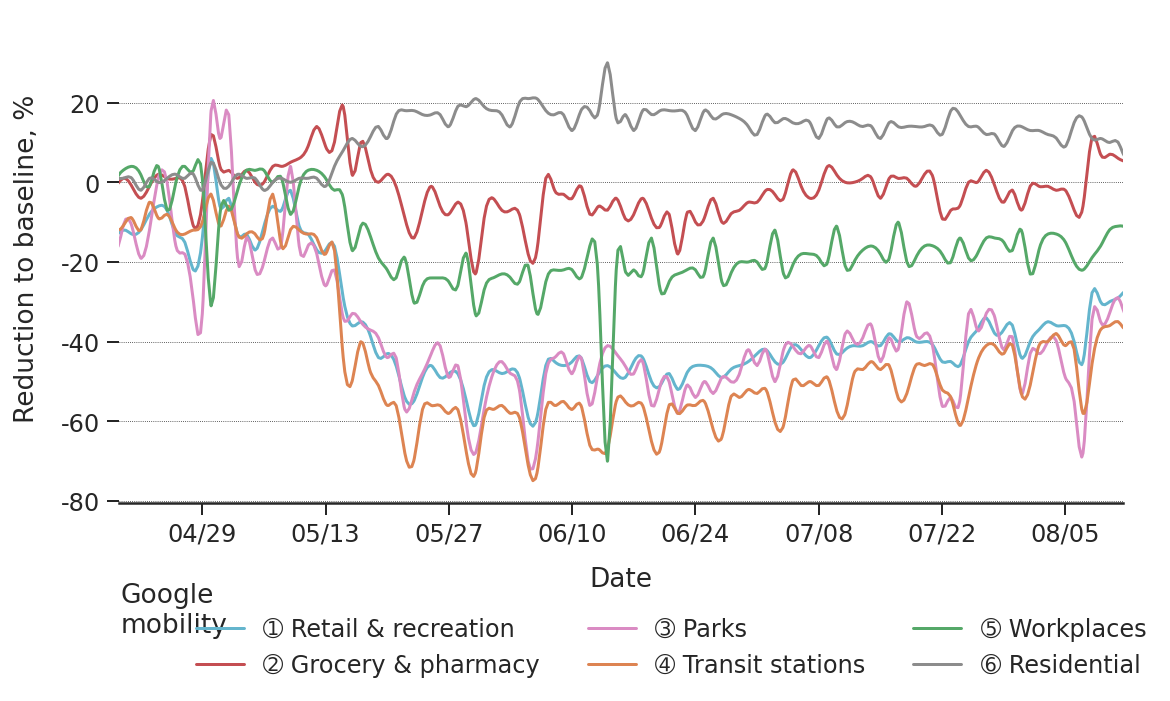

In [116]:
fig, ax = plt.subplots()
fig.set_size_inches(9,4.5); 

clrs_ = ["k", "#fe9929", "#E5614C99", "#97A1A799"] # via https://nanx.me/ggsci/index.html

# google mobility
x = [np.timedelta64(x-datemin_mobility,'D').astype('int64') for x in googlemobilitydata_['date'].values]
googlemobilitydata_['x'] = [np.timedelta64(x-datemin_mobility,'D').astype('int64') for x in googlemobilitydata_['date'].values]
x_ = np.linspace(0, np.max(x), 500)
df_y = googlemobilitydata_.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x', 'retail_and_recreation_percent_change_from_baseline']].\
    reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y.index, df_y.retail_and_recreation_percent_change_from_baseline, color='C9', lw=1.5, label="➀ Retail & recreation", zorder=2)

df_y = googlemobilitydata_.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x', 'grocery_and_pharmacy_percent_change_from_baseline']].\
    reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y.index, df_y.grocery_and_pharmacy_percent_change_from_baseline, color='C3', lw=1.5, label="➁ Grocery & pharmacy", zorder=2)

df_y = googlemobilitydata_.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x', 'parks_percent_change_from_baseline']].\
    reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y.index, df_y.parks_percent_change_from_baseline, color='C6', lw=1.5, label="➂ Parks", zorder=2)

df_y = googlemobilitydata_.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x', 'transit_stations_percent_change_from_baseline']].\
    reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y.index, df_y.transit_stations_percent_change_from_baseline, color='C1', lw=1.5, label="➃ Transit stations", zorder=2)

df_y = googlemobilitydata_.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x', 'workplaces_percent_change_from_baseline']].\
    reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y.index, df_y.workplaces_percent_change_from_baseline, color='C2', lw=1.5, label="➄ Workplaces", zorder=2)

df_y = googlemobilitydata_.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x', 'residential_percent_change_from_baseline']].\
    reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y.index, df_y.residential_percent_change_from_baseline, color='C7', lw=1.5, label="➅ Residential", zorder=2)

# # Facebook data
# x = [np.timedelta64(x-datemin,'D').astype('int64') for x in facebookdata_taipei['ds'].values]
# facebookdata_xinbei['x'] = [np.timedelta64(x-datemin,'D').astype('int64') for x in facebookdata_xinbei.loc[:,'ds'].values]
# x_ = np.linspace(0, np.max(x), 200)
# df_y_facebook = facebookdata_xinbei.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x','all_day_bing_tiles_visited_relative_change']].\
#     reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
# ax.plot(df_y_facebook.index, df_y_facebook.all_day_bing_tiles_visited_relative_change*100, color=clrs_[1], lw=1.5, linestyle='dashed', label="Facebook (New Taipei)", zorder=1)

# x = [np.timedelta64(x-datemin,'D').astype('int64') for x in facebookdata_taipei['ds'].values]
# facebookdata_taipei['x'] = [np.timedelta64(x-datemin,'D').astype('int64') for x in facebookdata_taipei.loc[:,'ds'].values]
# x_ = np.linspace(0, np.max(x), 200)
# df_y_facebook = facebookdata_taipei.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x','all_day_bing_tiles_visited_relative_change']].\
#     reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
# ax.plot(df_y_facebook.index, df_y_facebook.all_day_bing_tiles_visited_relative_change*100, color=clrs_[1], lw=1.5, label="Facebook (Taipei)",zorder=1)

xtks = np.arange(0,xmax_mobility+13,14)
ax.set_xticks(xtks)
ax.set_xticklabels([(datemin_mobility+np.timedelta64(int(x),'D')).strftime("%m/%d") for x in xtks],fontsize=12);
ax.set_xlim(xmin_mobility-.5,xmax_mobility+0.55)

ytks = [-80, -60, -40, -20, 0, 20]
[plt.axhline(y=y_, lw=.4, color='k', linestyle='dotted', zorder=-100) for y_ in ytks]
ax.set_yticks(ytks)
ax.set_yticklabels(ytks,fontsize=12);
ax.set_xlabel('Date',labelpad=10)
ax.set_ylabel('Reduction to baseline, %',labelpad=10)
leg = ax.legend(title='Google\nmobility', facecolor='white', frameon=False, fontsize=12, bbox_to_anchor=(0.55, -.4), ncol=3, loc='lower center')
leg._legend_box.align = "left"
leg.get_title().set_position((-75, -33))

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mobility-all_google.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mobility-all_google.pdf", format='pdf',bbox_inches='tight');

In [125]:
mobility_data = googlemobilitydata_.loc[:, ['date',
                            'retail_and_recreation_percent_change_from_baseline',
                            'grocery_and_pharmacy_percent_change_from_baseline',
                            'parks_percent_change_from_baseline',
                            'transit_stations_percent_change_from_baseline',
                            'workplaces_percent_change_from_baseline',
                            'residential_percent_change_from_baseline']]

In [158]:
mobility_data_ = mobility_data#.loc[lambda d: (d.date>=datemin)&(d.date<=datemax)]

In [159]:
%%R -i mobility_data_ -o pca -o mobility_dt
mobility_dt = mobility_data_[,-1]
pca_ = prcomp(mobility_dt |> t())
pca = pca_$rotation
summary(pca_)

Importance of components:
                            PC1      PC2      PC3      PC4      PC5       PC6
Standard deviation     267.9499 64.07105 29.26396 22.71976 12.42707 2.667e-14
Proportion of Variance   0.9273  0.05302  0.01106  0.00667  0.00199 0.000e+00
Cumulative Proportion    0.9273  0.98028  0.99134  0.99801  1.00000 1.000e+00


/home/andrei/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1210: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(
/home/andrei/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1210: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(
/home/andrei/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1210: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(
/home/andrei/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1210: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(
/home/andrei/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1210: UserWarning: You are mergi

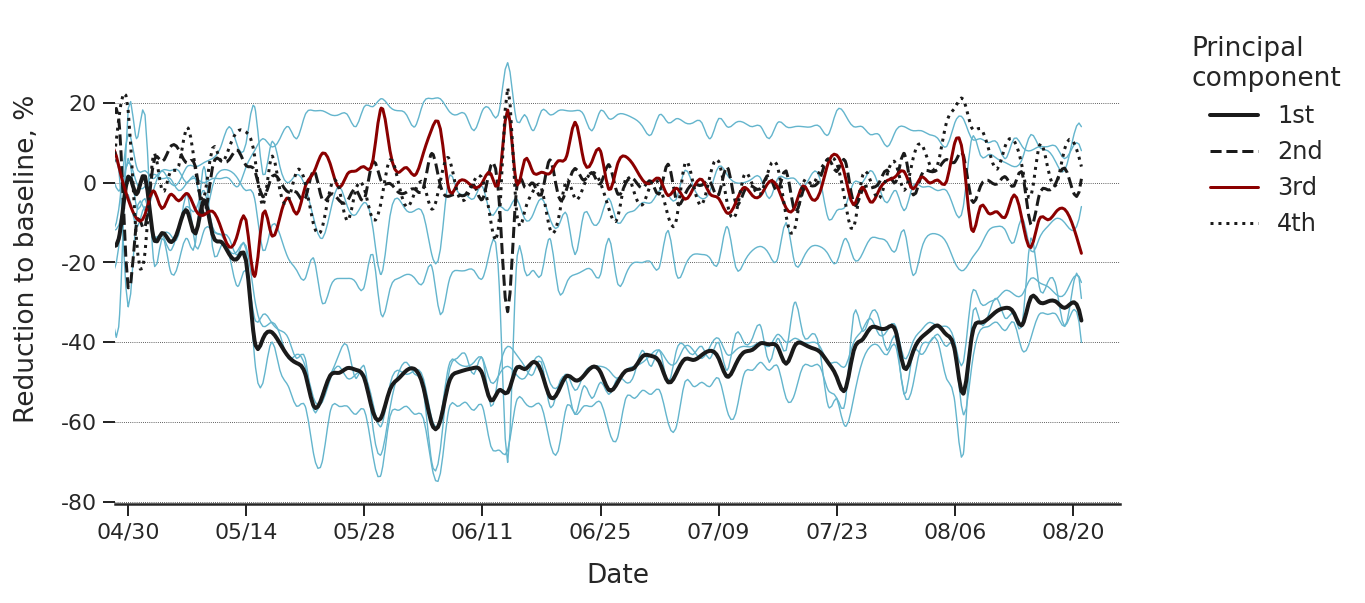

In [160]:
fig, ax = plt.subplots()
fig.set_size_inches(9,4.5); 

clrs_ = ["k", "#fe9929", "#E5614C99", "#97A1A799"] # via https://nanx.me/ggsci/index.html

# google mobility
x = [np.timedelta64(x-datemin_mobility,'D').astype('int64') for x in mobility_data_['date'].values]
x_ = np.linspace(0, np.max(x), 500)
df_y = pd.DataFrame({'x': x, 'y': -pca[:,0]*450}).merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y.index, df_y.y, color='k', lw=2, label="1st",zorder=1)

df_y = pd.DataFrame({'x': x, 'y': -pca[:,1]*100}).merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y.index, df_y.y, color='k', lw=1.5, ls='dashed', label="2nd",zorder=1)

df_y = pd.DataFrame({'x': x, 'y': -pca[:,2]*80}).merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y.index, df_y.y, color='darkred', lw=1.5, ls='solid', label="3rd",zorder=1)

df_y = pd.DataFrame({'x': x, 'y': pca[:,3]*100}).merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').set_index('x').interpolate(method='spline', order=3, s=0.)
ax.plot(df_y.index, df_y.y, color='k', lw=1.5, ls='dotted', label="4th",zorder=1)

# df_y = pd.DataFrame({'x': x, 'y': pca[:,4]*100}).merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').set_index('x').interpolate(method='spline', order=3, s=0.)
# ax.plot(df_y.index, df_y.y, color='darkred', lw=1.5, ls='dashed', label="5th",zorder=1)

# # google mobility
for var_ in ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline',
              'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']:
    df_y = googlemobilitydata_.merge(pd.DataFrame({'x': x_}), how='outer').sort_values('x').loc[:,['x', var_]].\
        reset_index(drop=True).set_index('x').interpolate(method='spline', order=3, s=0.)
    ax.plot(df_y.index, df_y[var_].values, color='C9', lw=.7, zorder=-2)

xtks = np.arange(1,xmax_mobility+13,14)
ax.set_xticks(xtks)
ax.set_xticklabels([(datemin_mobility+np.timedelta64(int(x),'D')).strftime("%m/%d") for x in xtks],fontsize=11);
ax.set_xlim(xmin_mobility-.5,xmax_mobility+0.55)

ytks = [-80, -60, -40, -20, 0, 20]
[plt.axhline(y=y_, lw=.4, color='k', linestyle='dotted', zorder=-100) for y_ in ytks]
ax.set_yticks(ytks)
ax.set_yticklabels(ytks,fontsize=11);
ax.set_xlabel('Date',labelpad=10)
ax.set_ylabel('Reduction to baseline, %',labelpad=10)
# frame = ax.legend(title='Principal\ncomponent',facecolor='white',frameon=True,fontsize=12,loc='upper right')
frame = ax.legend(title='Principal\ncomponent',facecolor='white',frameon=False,fontsize=12,bbox_to_anchor=(1.05, 1), loc='upper left')
frame.get_frame().set_alpha(.9)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mobility-pca.tiff", format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../figures_"+truncation_date.strftime("%Y%m%d")+"/draft/mobility-pca.pdf", format='pdf',bbox_inches='tight');

In [161]:
df_pca = pd.DataFrame({'t': x, 'y1': -pca[:,0], 'y2': pca[:,1], 'y3': -pca[:,2], 'y4': pca[:,3], 'y5': pca[:,4], 'y6': pca[:,5]})
df_pca['d'] = [datemin_mobility+np.timedelta64(int(x),'D') for x in df_pca.t]
df_pca.to_csv("../../data/df_pca_mobility_"+truncation_date.strftime("%Y%m%d")+".csv", index=False)
df_pca[-5:]

,t,y1,y2,y3,y4,y5,y6,d
138,138,-0.066193,0.018055,-0.116468,0.038081,-0.027875,-0.004470,2021-08-17
139,139,-0.066273,-0.000079,-0.091065,-0.005331,-0.063024,-0.059247,2021-08-18
140,140,-0.069693,-0.036450,-0.083124,0.083429,0.055671,-0.052084,2021-08-19
141,141,-0.066640,0.021565,-0.134933,0.103427,-0.001734,0.047294,2021-08-20
142,142,-0.076738,-0.009490,-0.221419,0.040077,0.153261,-0.018278,2021-08-21


In [162]:
mobility_dt_ = mobility_dt / 100
# mobility_dt_.columns = ['retail_recreation', 'grocery_pharmacy', 'parks', 'transit', 'workplaces', 'residential']
mobility_dt_.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
df_pca = mobility_dt_.reset_index(drop=1).reset_index().rename(columns={'index':'t'}).merge(df_pca)

In [163]:
df_pca_ = pd.DataFrame({'t': np.arange(0,truncation_day+1)}).merge(df_pca, how='left') 
df_pca_['d'] = [pd.DateOffset(x - truncation_day, 'D') + truncation_date for x in df_pca_.t]
df_pca_ = df_pca_.fillna(method='ffill')
df_pca_.to_csv("../../data/df_pca_mobility_"+truncation_date.strftime("%Y%m%d")+".csv", index=False)
df_pca_[-8:]

,t,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6,d
139,139,-0.28,0.05,-0.26,-0.33,-0.09,0.09,-0.066273,-0.000079,-0.091065,-0.005331,-0.063024,-0.059247,2021-08-18
140,140,-0.28,0.03,-0.36,-0.36,-0.10,0.06,-0.069693,-0.036450,-0.083124,0.083429,0.055671,-0.052084,2021-08-19
141,141,-0.24,0.11,-0.26,-0.32,-0.12,0.09,-0.066640,0.021565,-0.134933,0.103427,-0.001734,0.047294,2021-08-20
142,142,-0.25,0.14,-0.29,-0.40,-0.06,0.08,-0.076738,-0.009490,-0.221419,0.040077,0.153261,-0.018278,2021-08-21
143,143,-0.25,0.14,-0.29,-0.40,-0.06,0.08,-0.076738,-0.009490,-0.221419,0.040077,0.153261,-0.018278,2021-08-22
144,144,-0.25,0.14,-0.29,-0.40,-0.06,0.08,-0.076738,-0.009490,-0.221419,0.040077,0.153261,-0.018278,2021-08-23
145,145,-0.25,0.14,-0.29,-0.40,-0.06,0.08,-0.076738,-0.009490,-0.221419,0.040077,0.153261,-0.018278,2021-08-24
146,146,-0.25,0.14,-0.29,-0.40,-0.06,0.08,-0.076738,-0.009490,-0.221419,0.040077,0.153261,-0.018278,2021-08-25
